# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis



In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\CIA_Country_Facts.csv')

In [3]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790471e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228686e+01   
Net migration                       224.0  3.812500e-02  4.889269e+00   
Infant mortality (per 1000 births)  224.0  3.550696e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972217e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279918e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163831e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993968e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827109e-01  1.382722e-01   
Service                             212.0  5.652830e-01  1.658410e-01   

                                         min           25%          50%  \
Population                          7026.000  437624.00000  4786994.000   
Area (sq. mi.)                         2.000    4647.50000    86600.000   
Pop. Density (per sq. mi.)             0.000      29.15000       78.800   
Coastline (coast/area ratio)           0.000       0.10000        0.730   
Net migration                        -20.990      -0.92750        0.000   
Infant mortality (per 1000 births)     2.290       8.15000       21.000   
GDP ($ per capita)                   500.000    1900.00000     5550.000   
Literacy (%)                          17.600      70.60000       92.500   
Phones (per 1000)                      0.200      37.80000      176.200   
Arable (%)                             0.000       3.22000       10.420   
Crops (%)                              0.000       0.19000        1.030   
Other (%)                             33.330      71.65000       85.700   
Climate                                1.000       2.00000        2.000   
Birthrate                              7.290      12.67250       18.790   
Deathrate                              2.290       5.91000        7.840   
Agriculture                            0.000       0.03775        0.099   
Industry                               0.020       0.19300        0.272   
Service                                0.062       0.42925        0.571   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry                            3.410000e-01  9.060000e-01  
Service                             6.785000e-01  9.

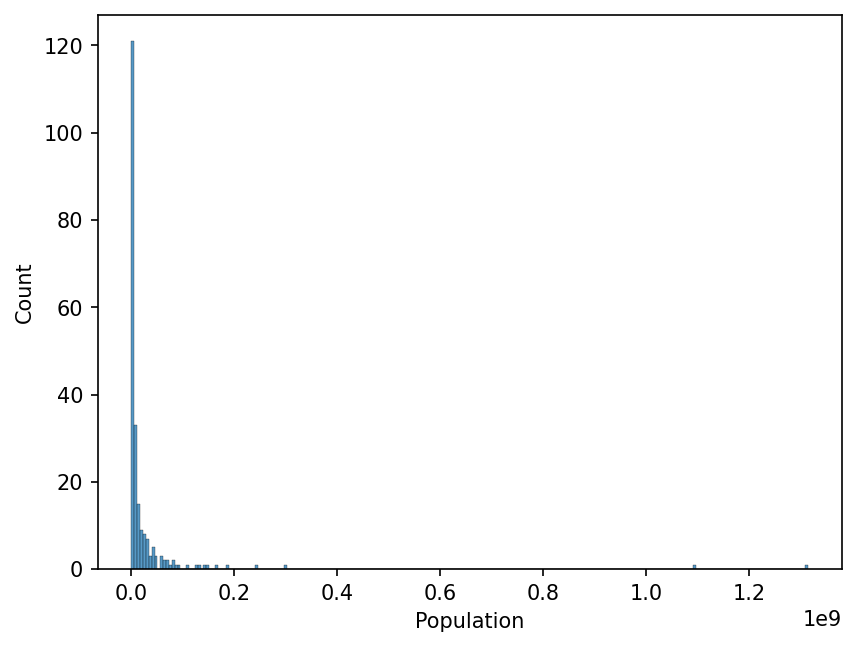

In [6]:
plt.figure(dpi = 150)
sns.histplot(data = df , x = 'Population')
plt.show()

In [7]:
less_population = df[df['Population']<500000000]

In [8]:
less_population

Country                               Region  Population  \
0       Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1           Albania  EASTERN EUROPE                          3581655   
2           Algeria  NORTHERN AFRICA                        32930091   
3    American Samoa  OCEANIA                                   57794   
4           Andorra  WESTERN EUROPE                            71201   
..              ...                                  ...         ...   
222       West Bank  NEAR EAST                               2460492   
223  Western Sahara  NORTHERN AFRICA                          273008   
224           Yemen  NEAR EAST                              21456188   
225          Zambia  SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223            NaN                                 NaN                 NaN   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
0            36.0                3.2       12.13       0.22      87.65   
1            86.5               71.2       21.09       4.42      74.49   
2            70.0               78.1        3.22       0.25      96.53   
3            97.0              259.5       10.00      15.00      75.00   
4           100.0              497.2        2.22       0.00      97.78   
..            ...                ...         ...        ...        ...   
222           NaN              145.2       16.90      18.97      64.13   
223           NaN                NaN        0.02       0.00      99.98   
224          50.2               37.2        2.78       0.24      96.98   
225          80.6                8.2        7.08       0.03      92.90   
226          90.7               26.8        8.32       0.34      91.34   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
0        1.0      46.60      20.34        0.380     0.240    0.380  
1        3.0      15.11       5.22        0.232     0.188    0.579  
2        1.0      17.14       4.61        0.101     0.600    0.298  
3        2.0      22.46       3.27          NaN       NaN      NaN  
4  

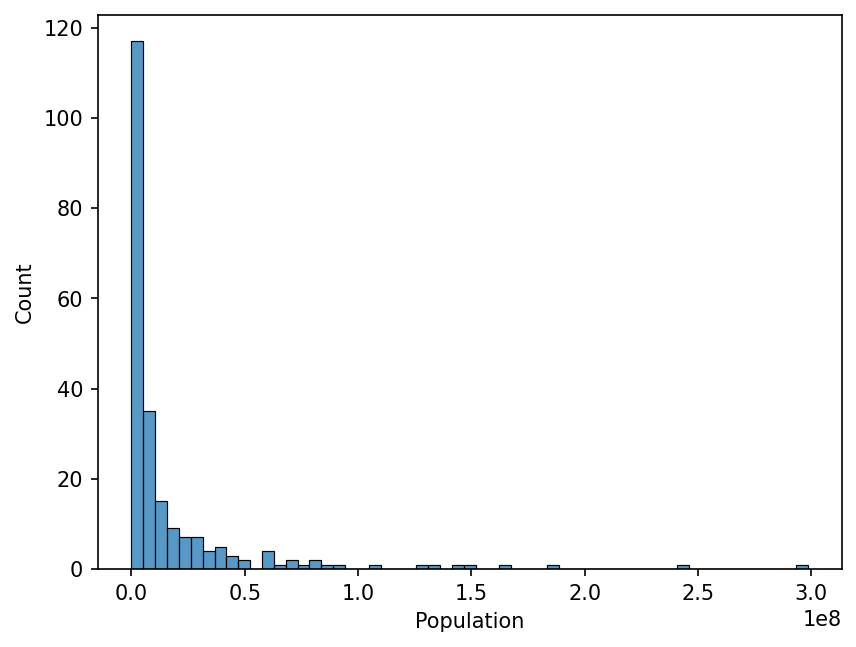

In [9]:
plt.figure(dpi = 150)
sns.histplot(data =less_population  , x = 'Population')
plt.show()

In [10]:
df['Region'].nunique()

11

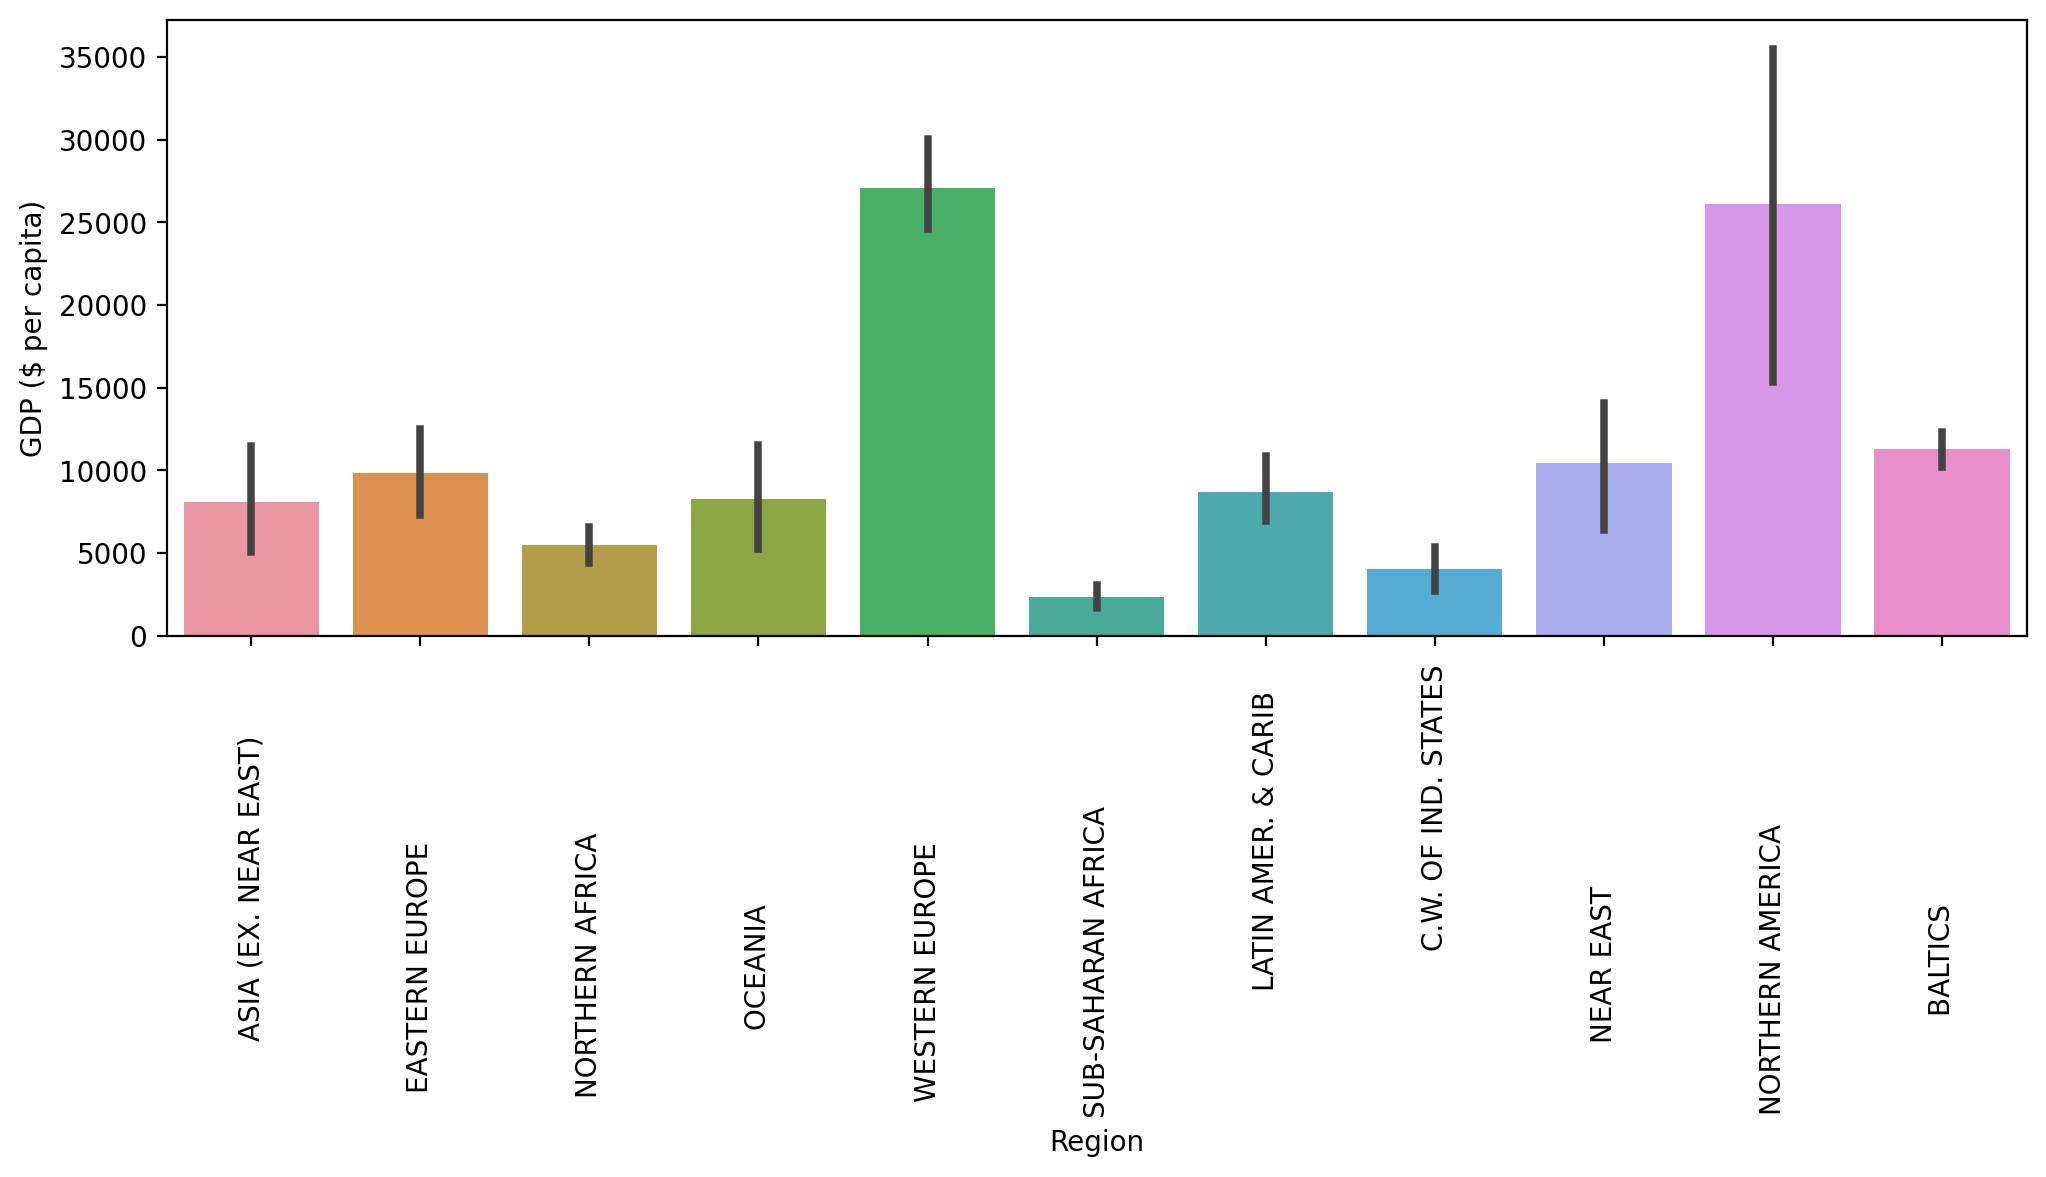

In [11]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot(data = df , x = 'Region',y = 'GDP ($ per capita)', estimator = 'mean')
plt.xticks(rotation = 90);

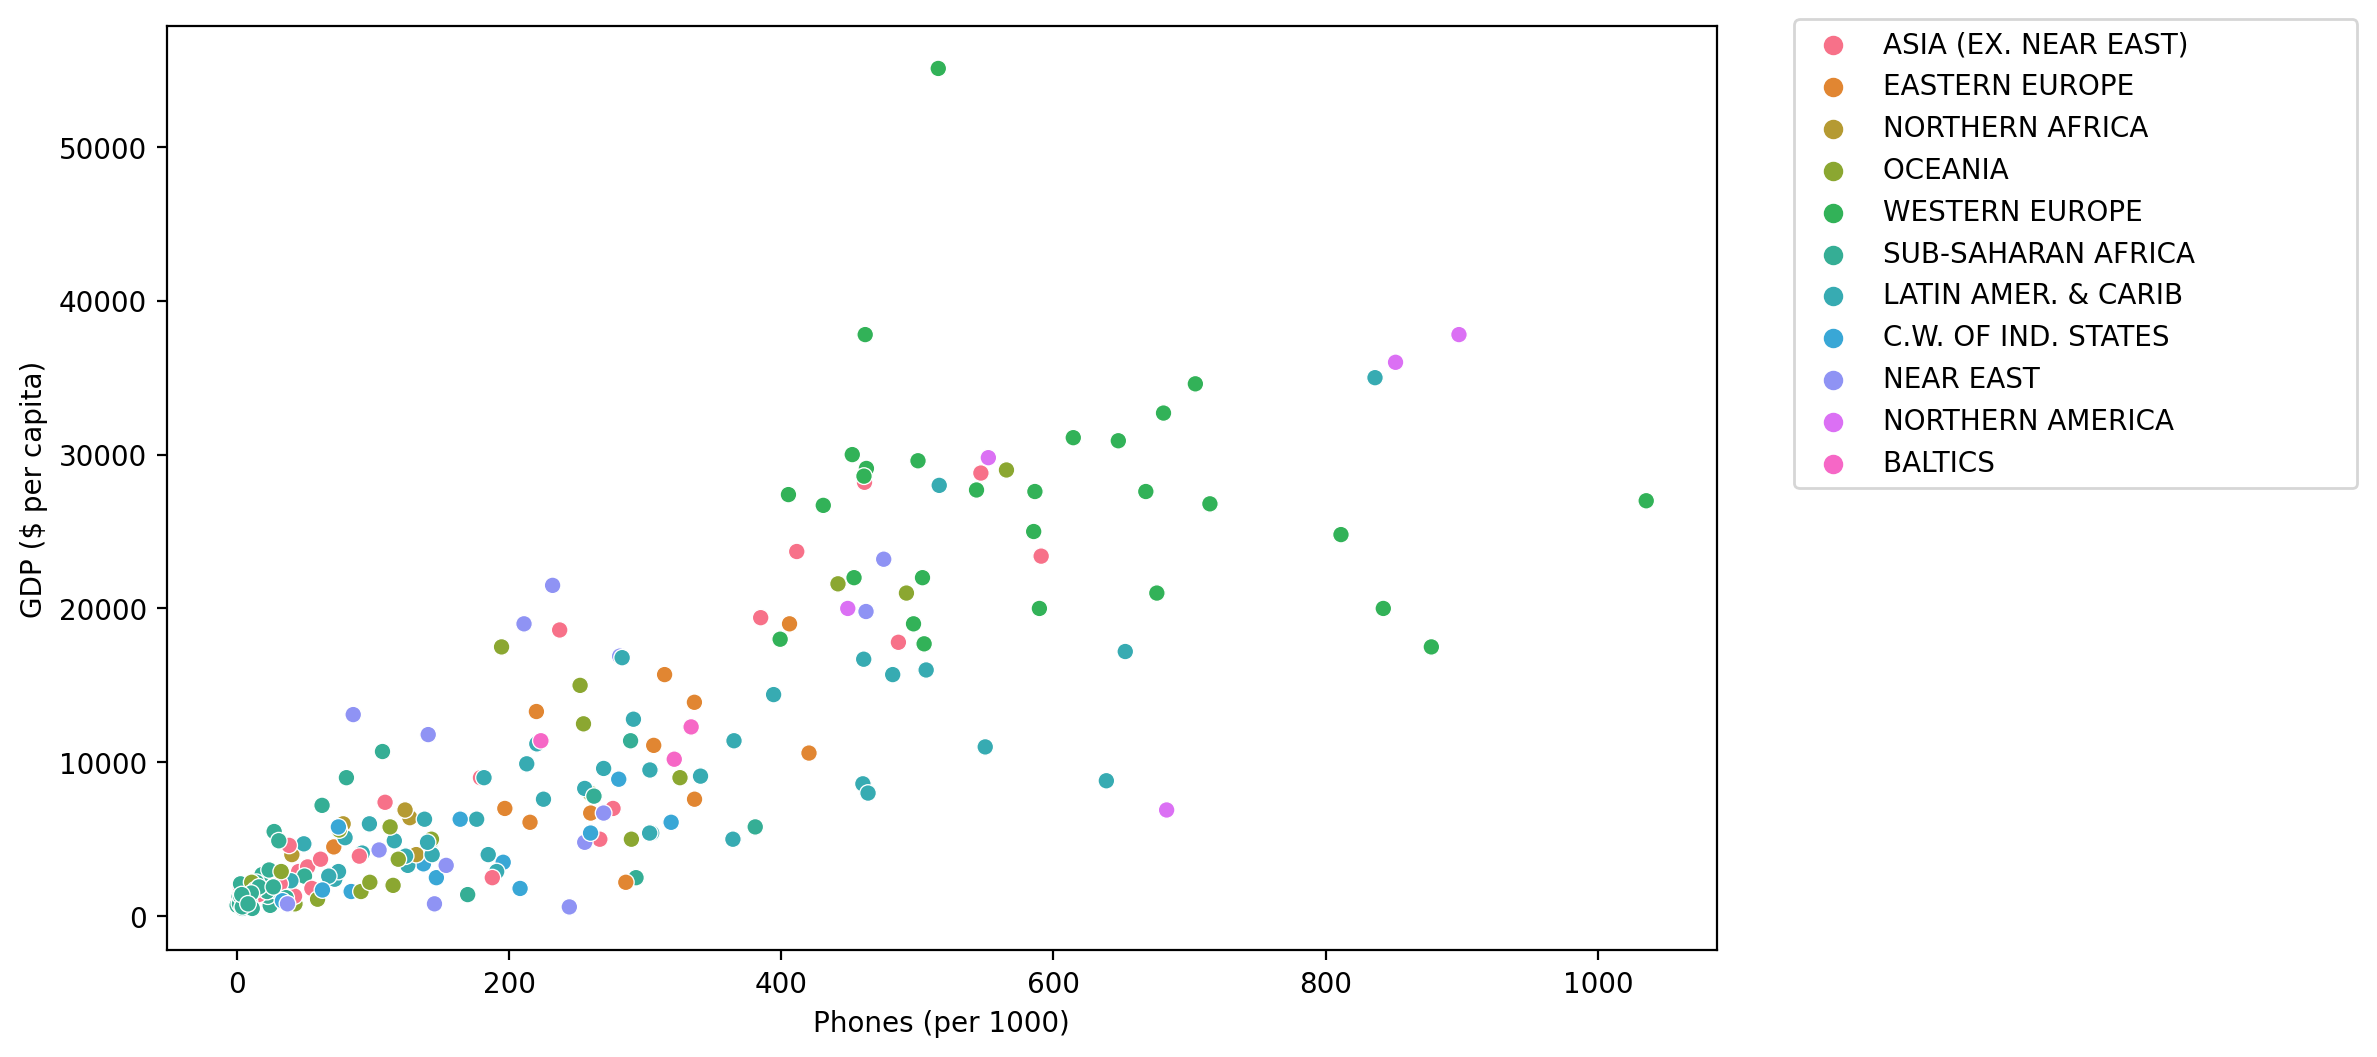

In [12]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Phones (per 1000)',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

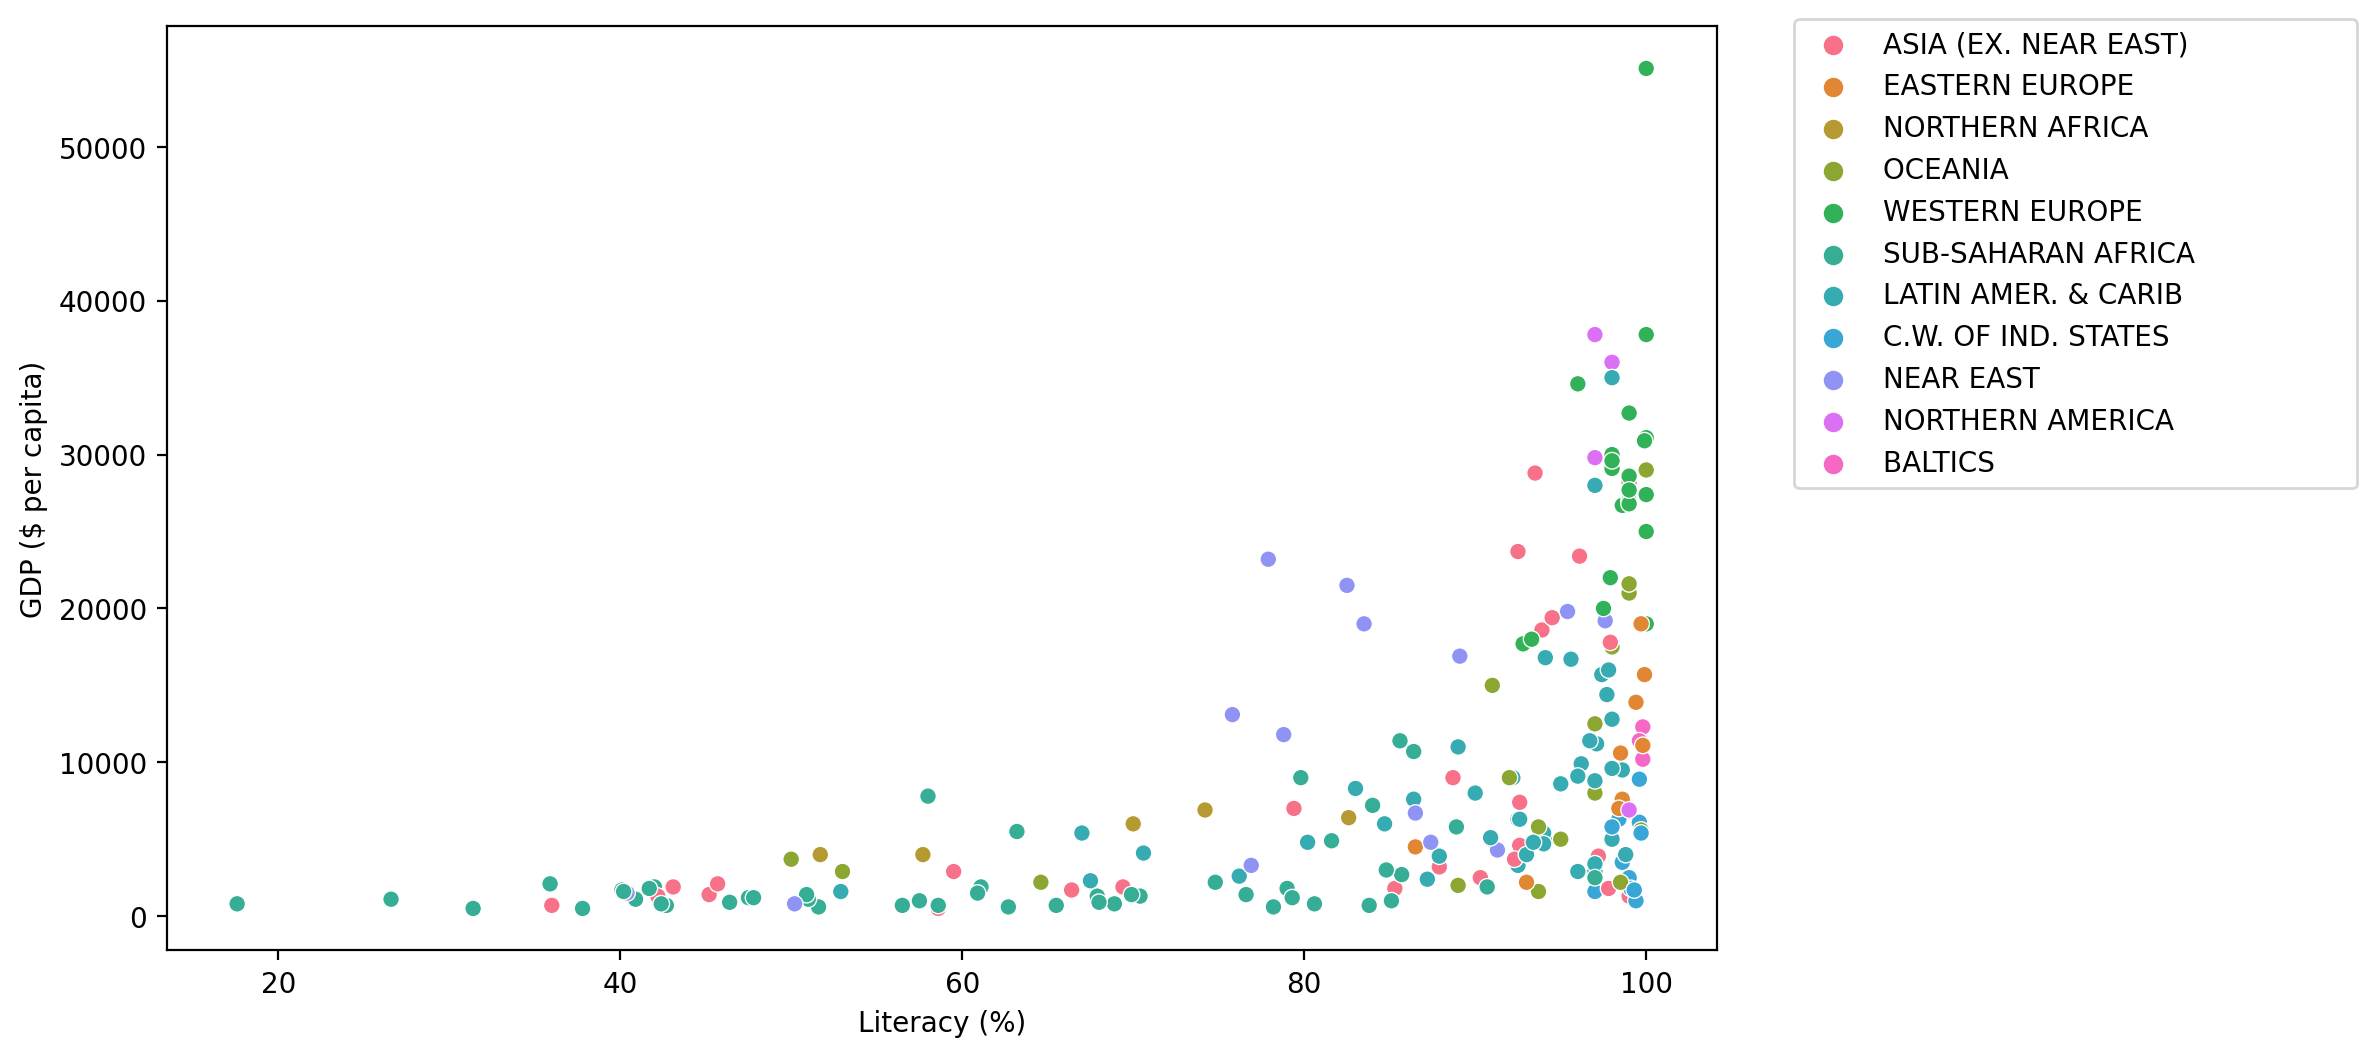

In [13]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Literacy (%)',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

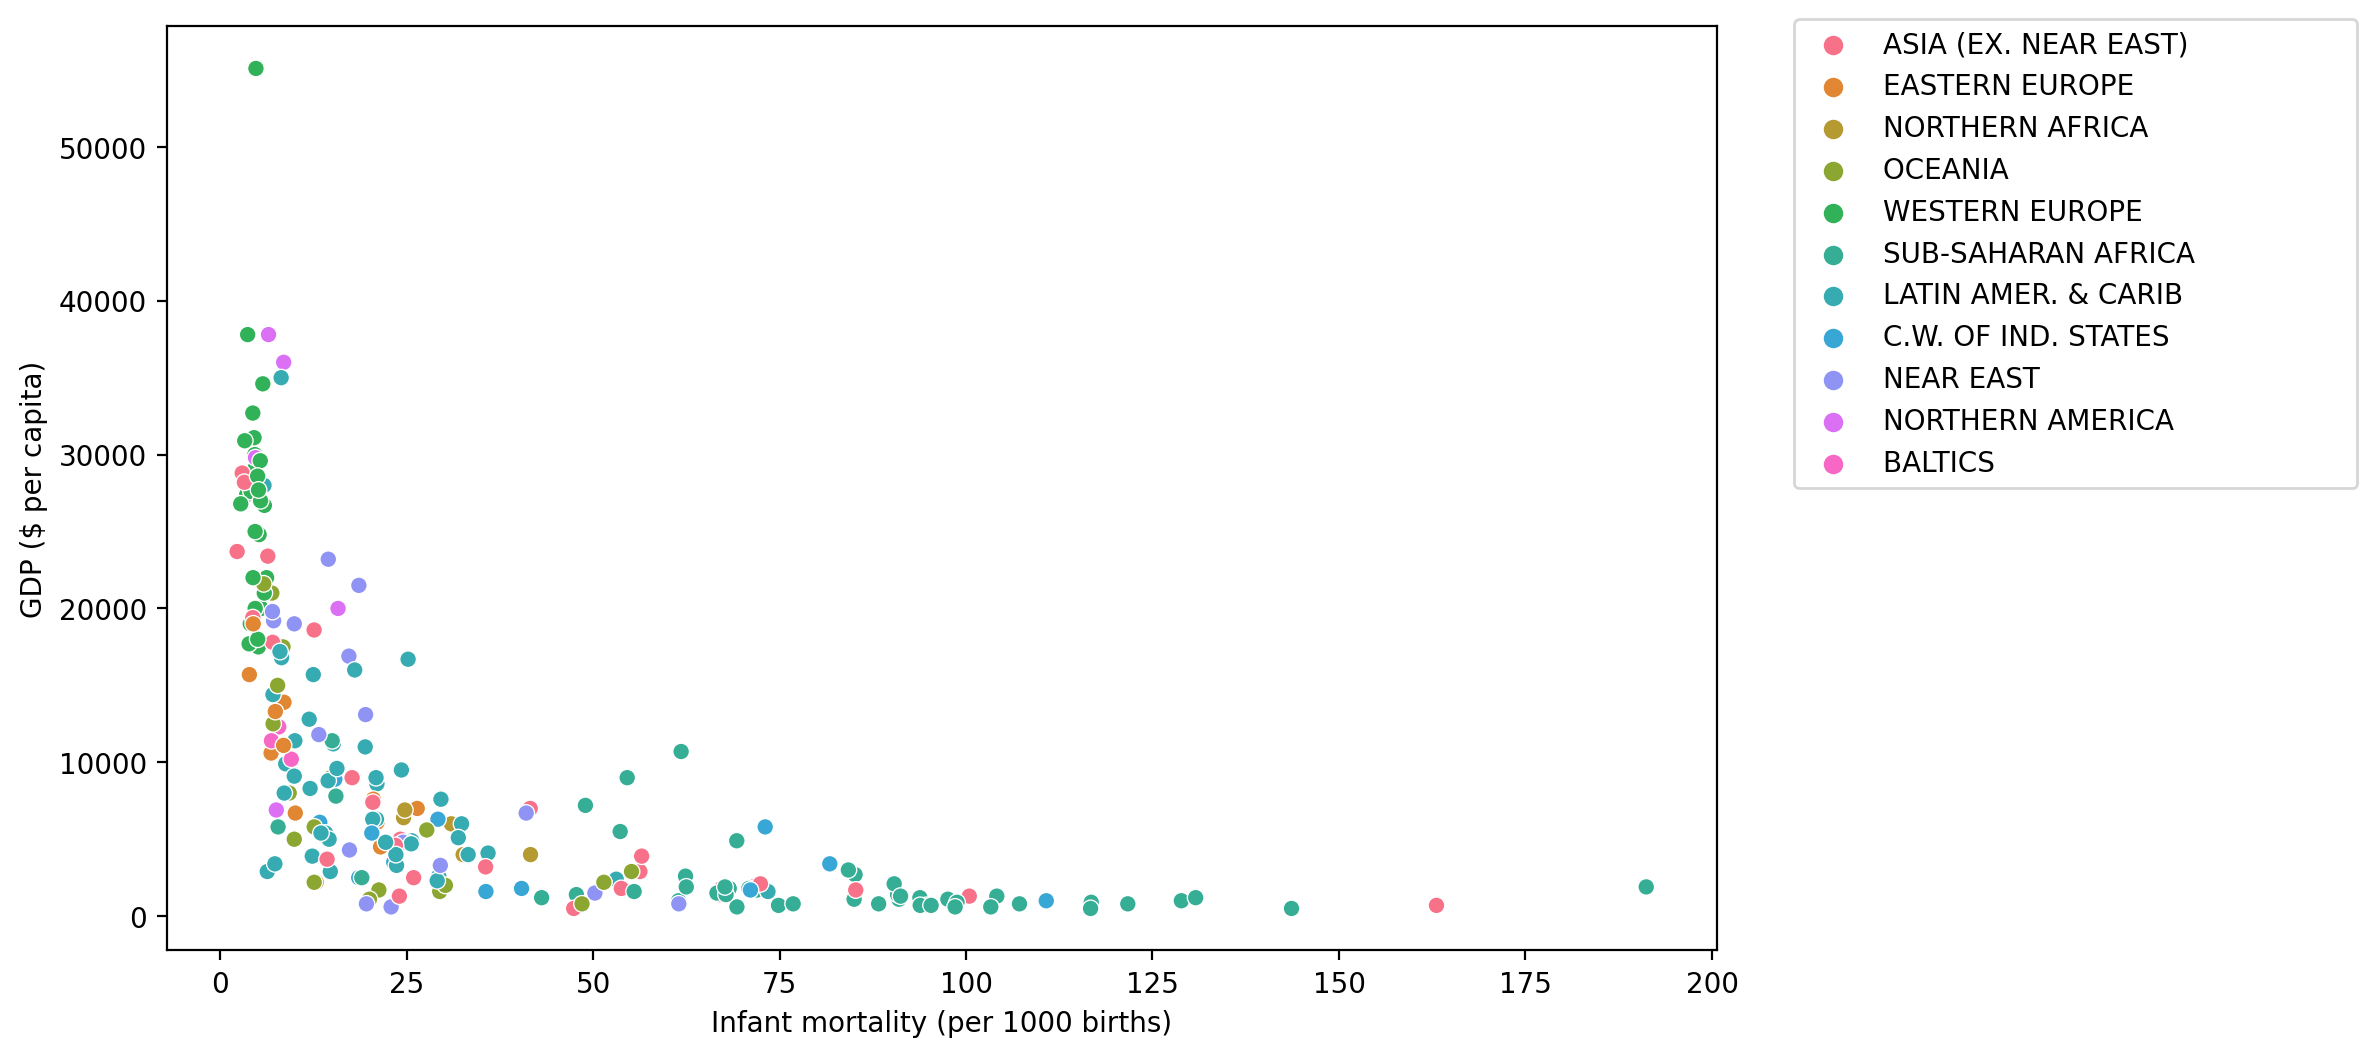

In [14]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Infant mortality (per 1000 births)',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

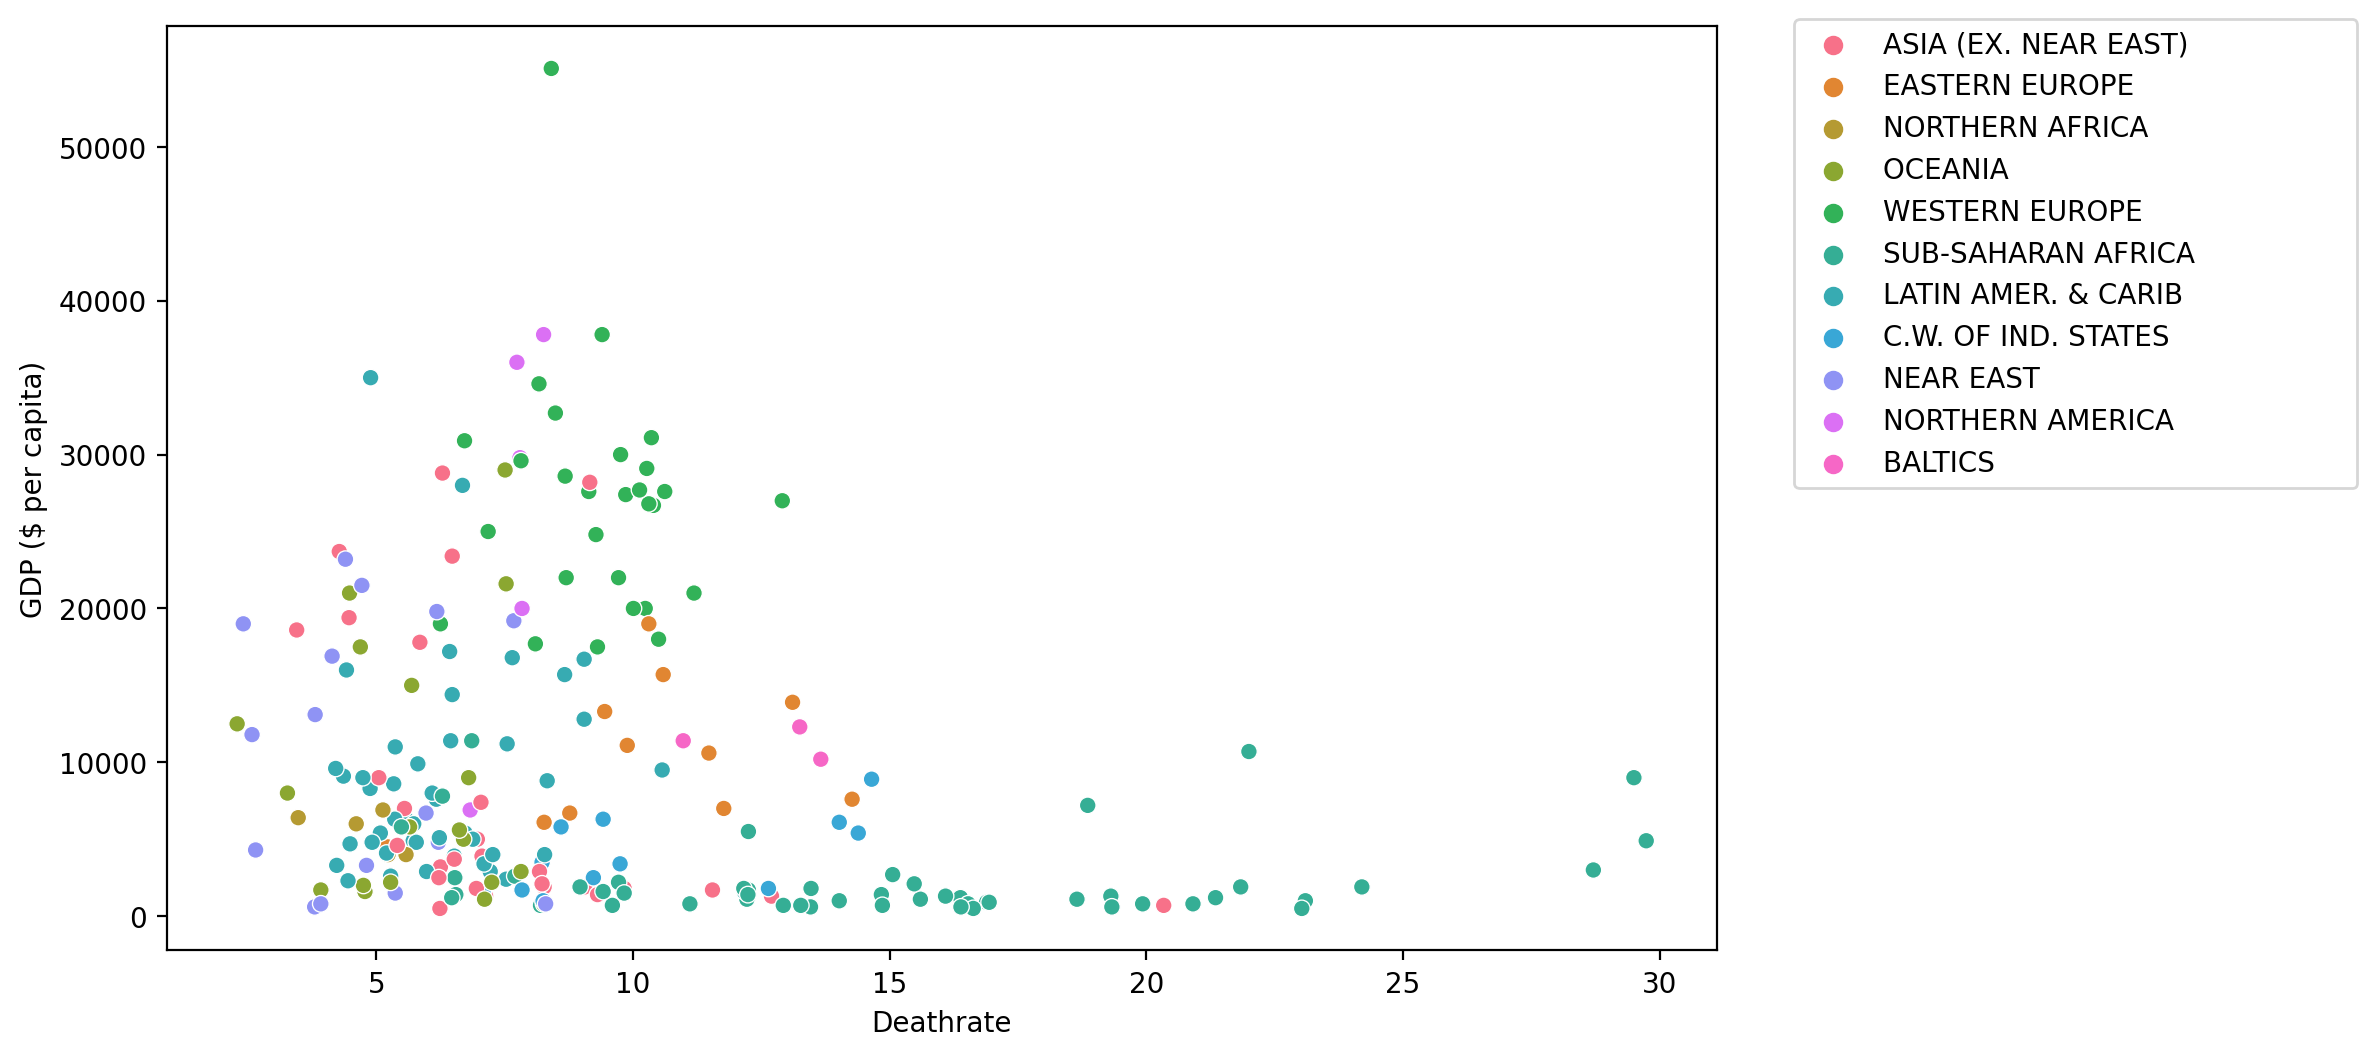

In [15]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Deathrate',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

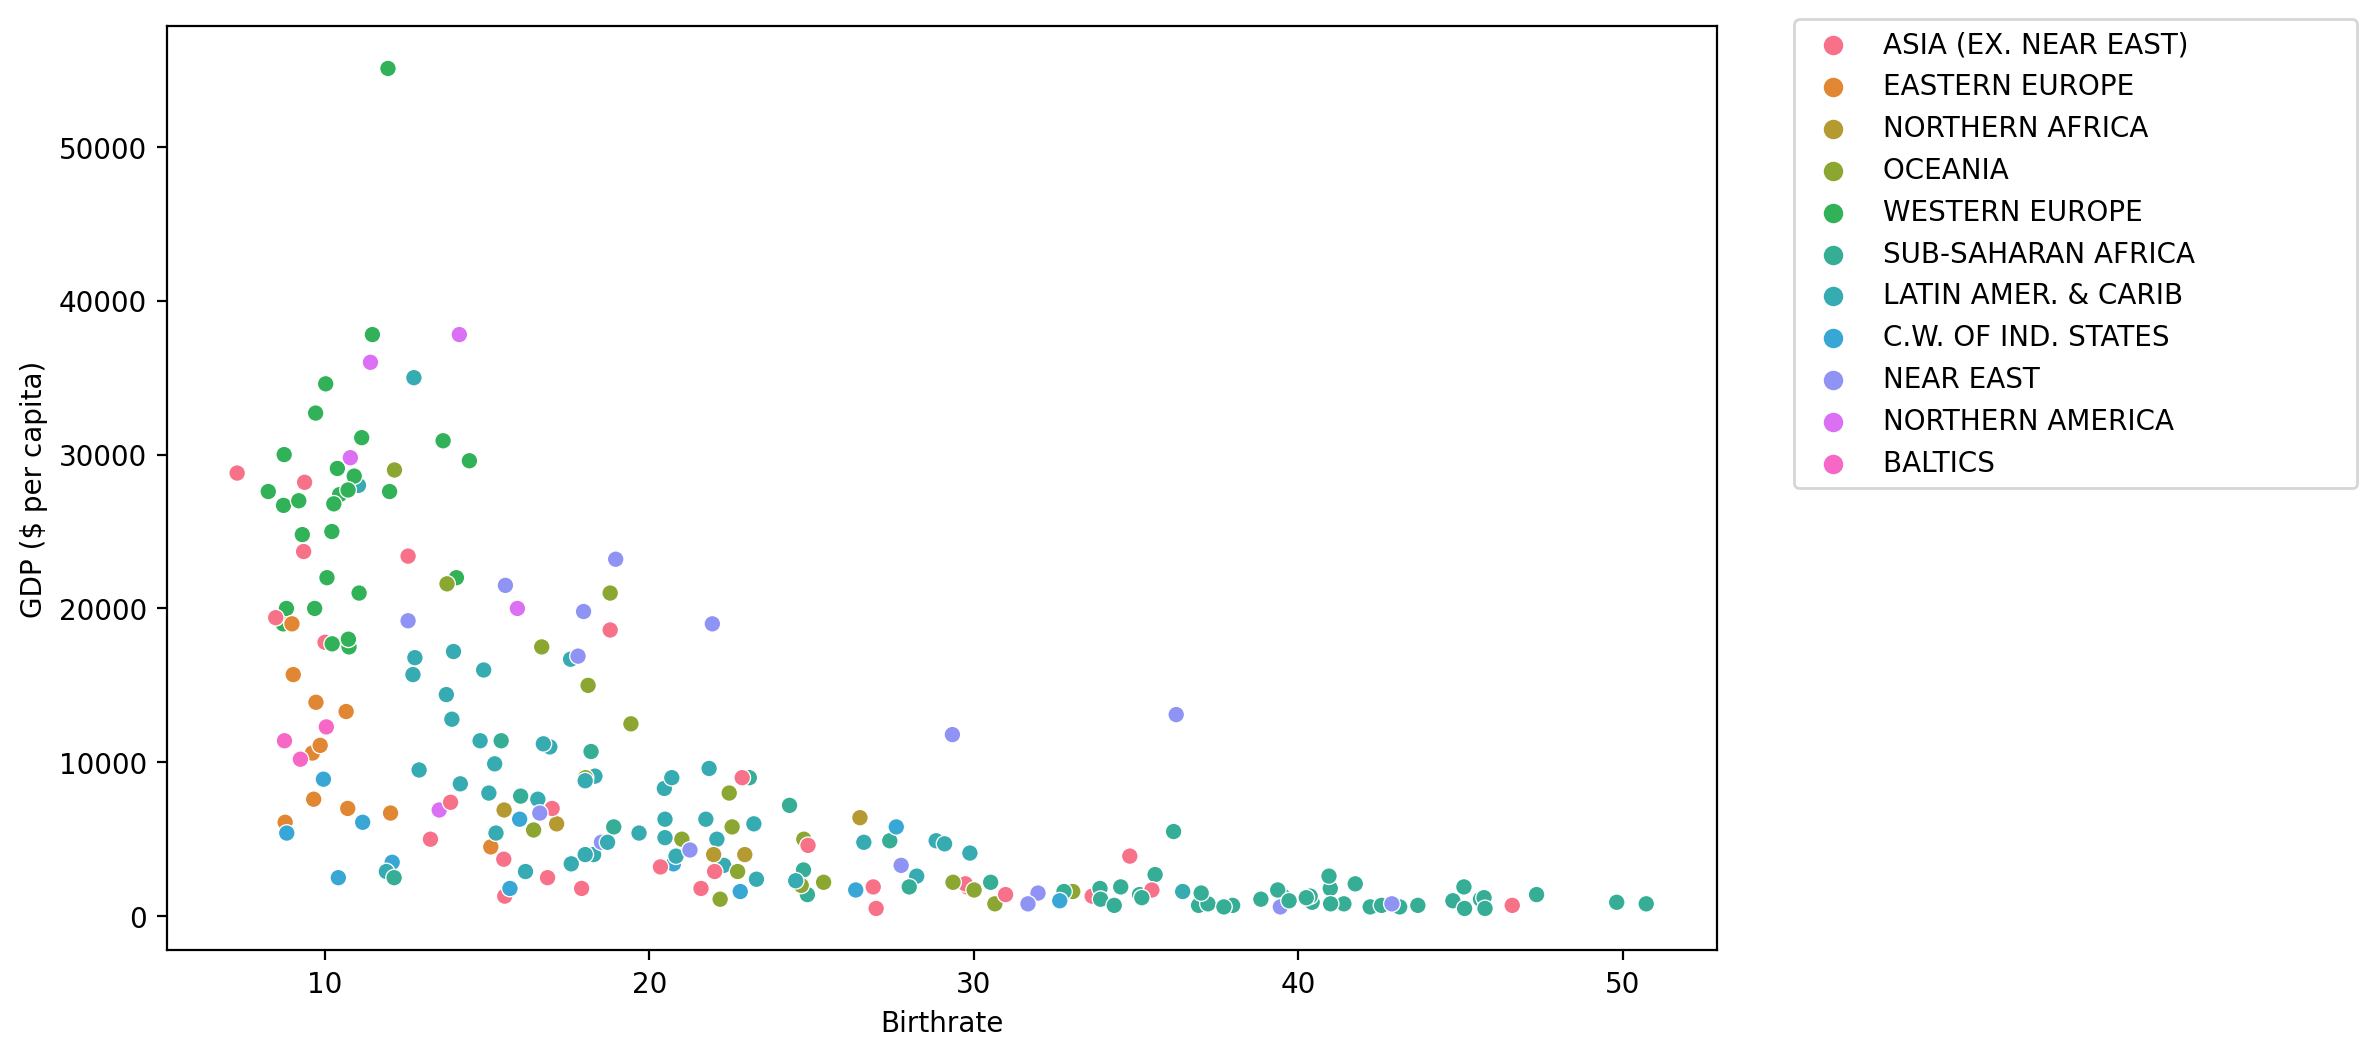

In [16]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Birthrate',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

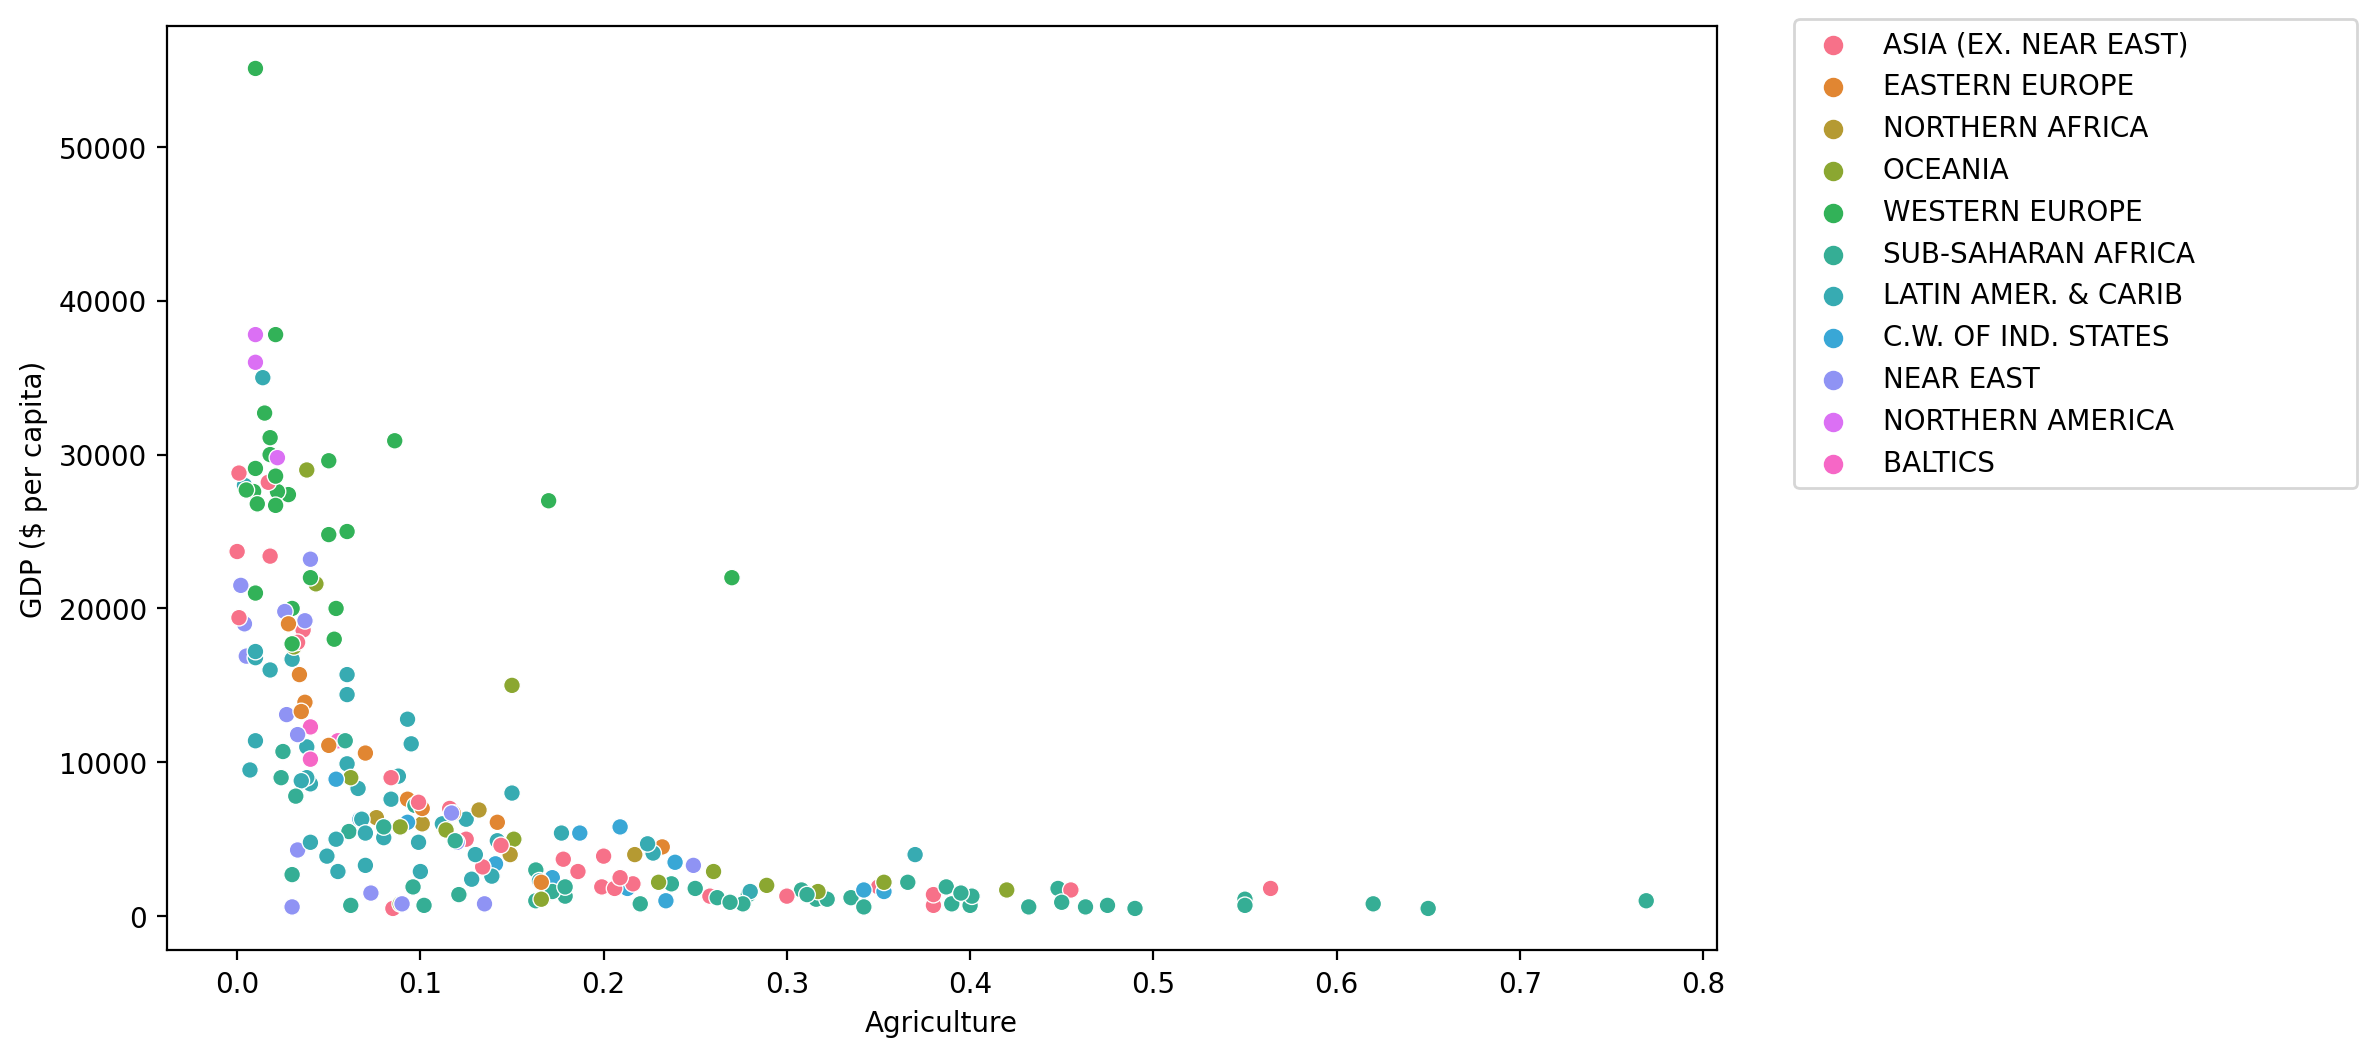

In [17]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Agriculture',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

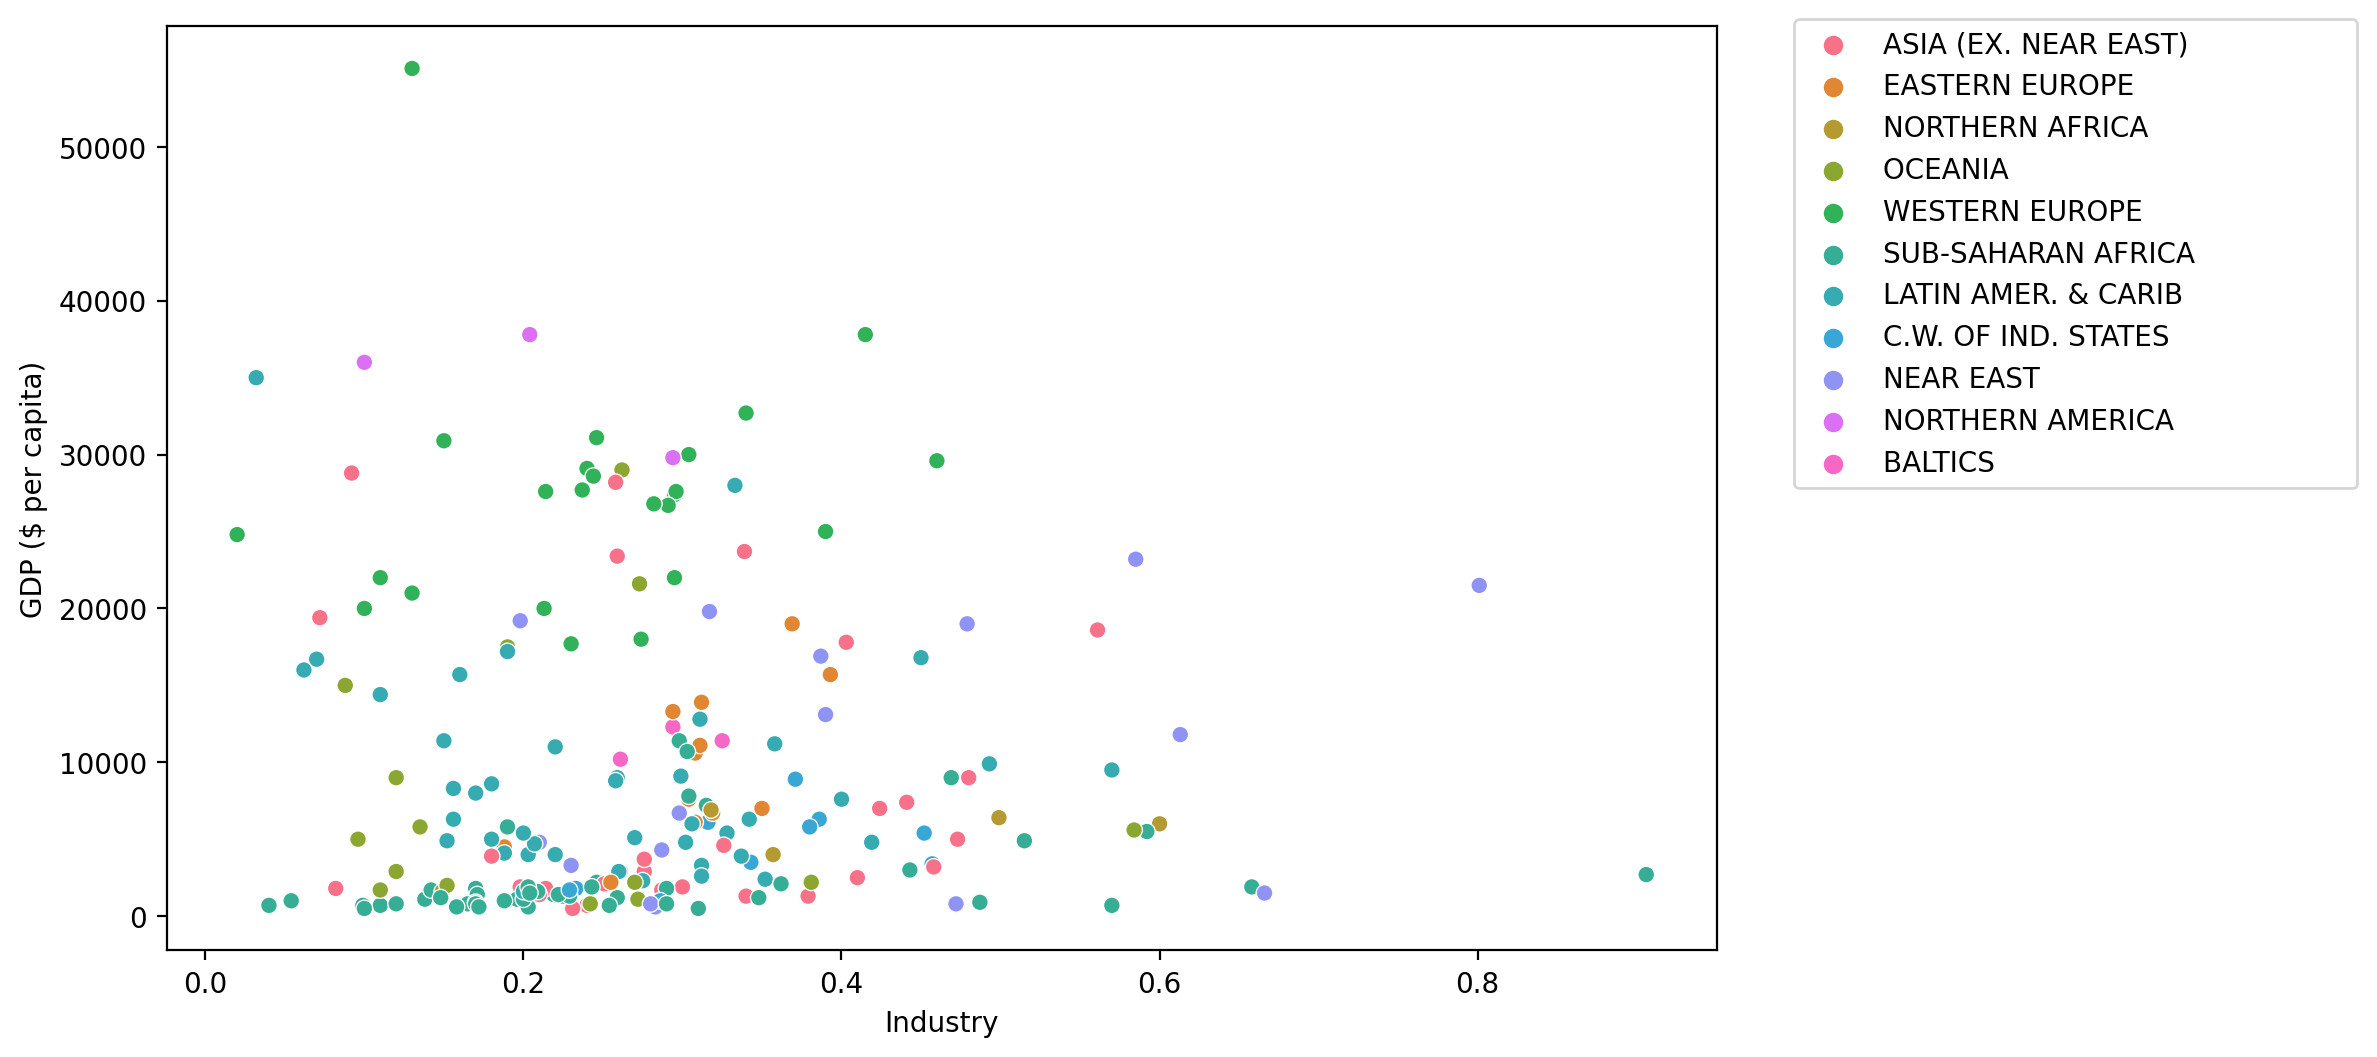

In [18]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Industry',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

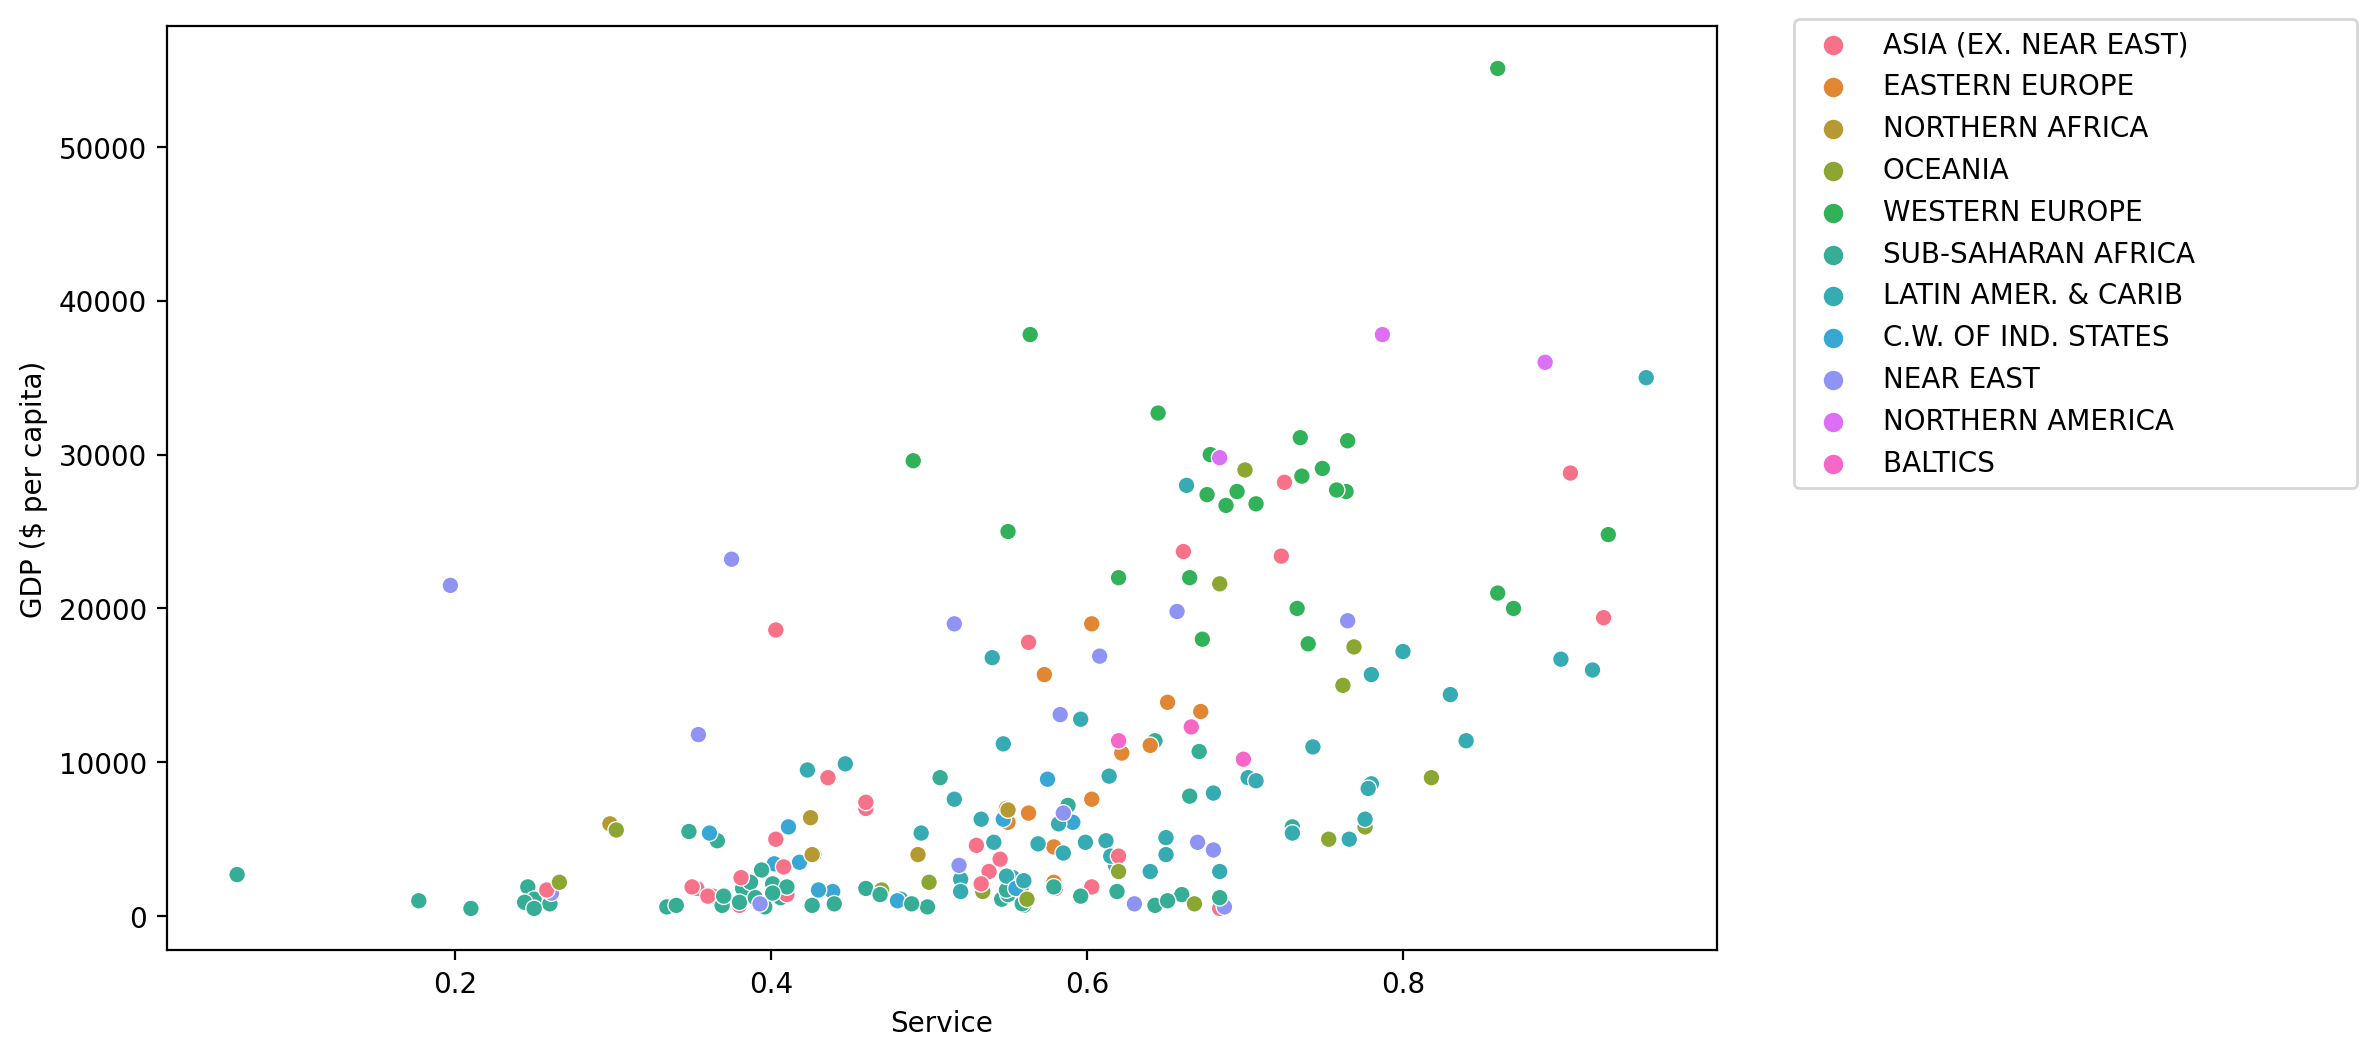

In [19]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Service',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

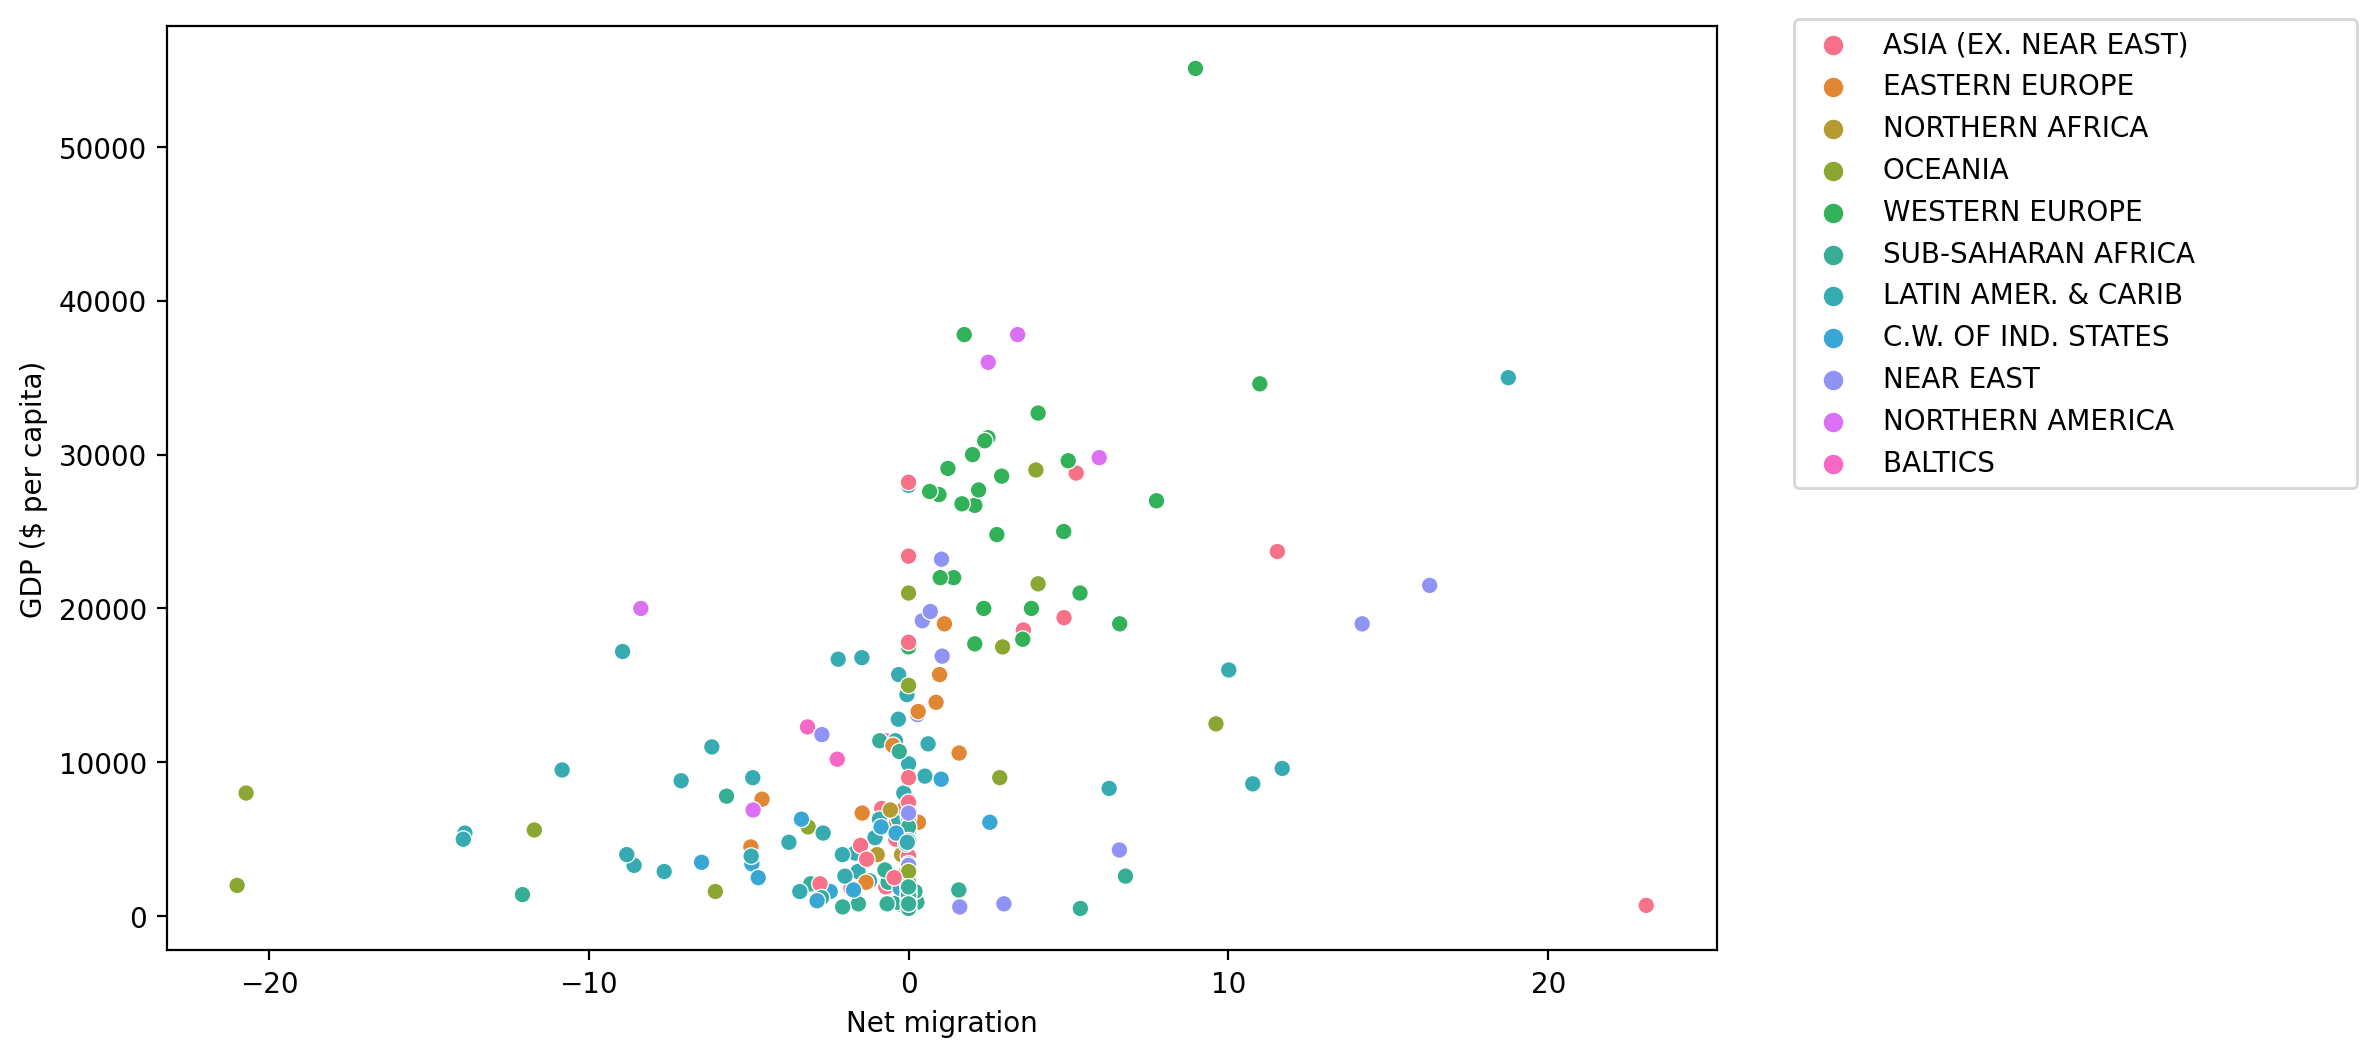

In [20]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Net migration',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

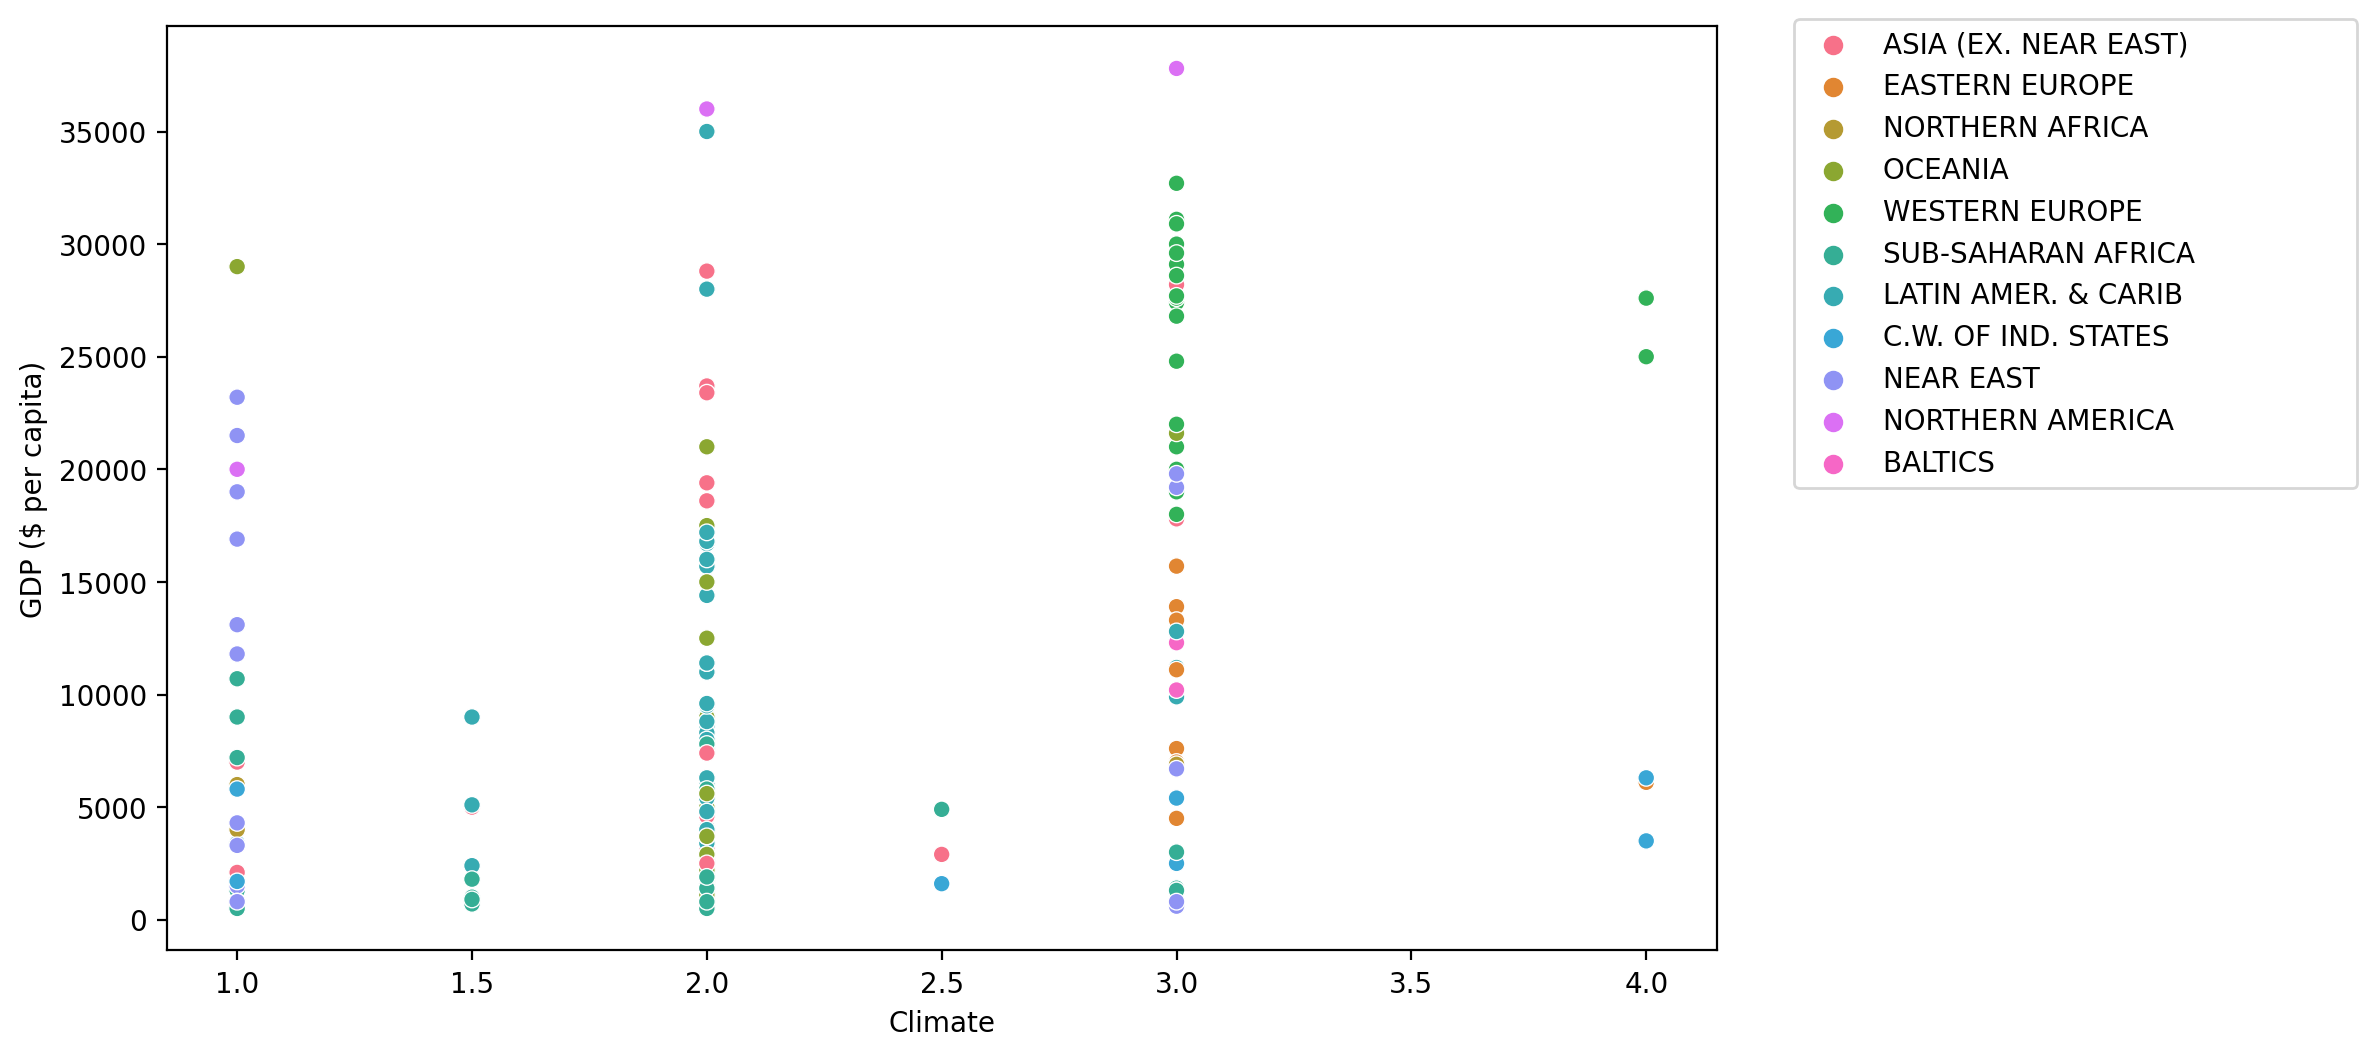

In [21]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Climate',y = 'GDP ($ per capita)',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

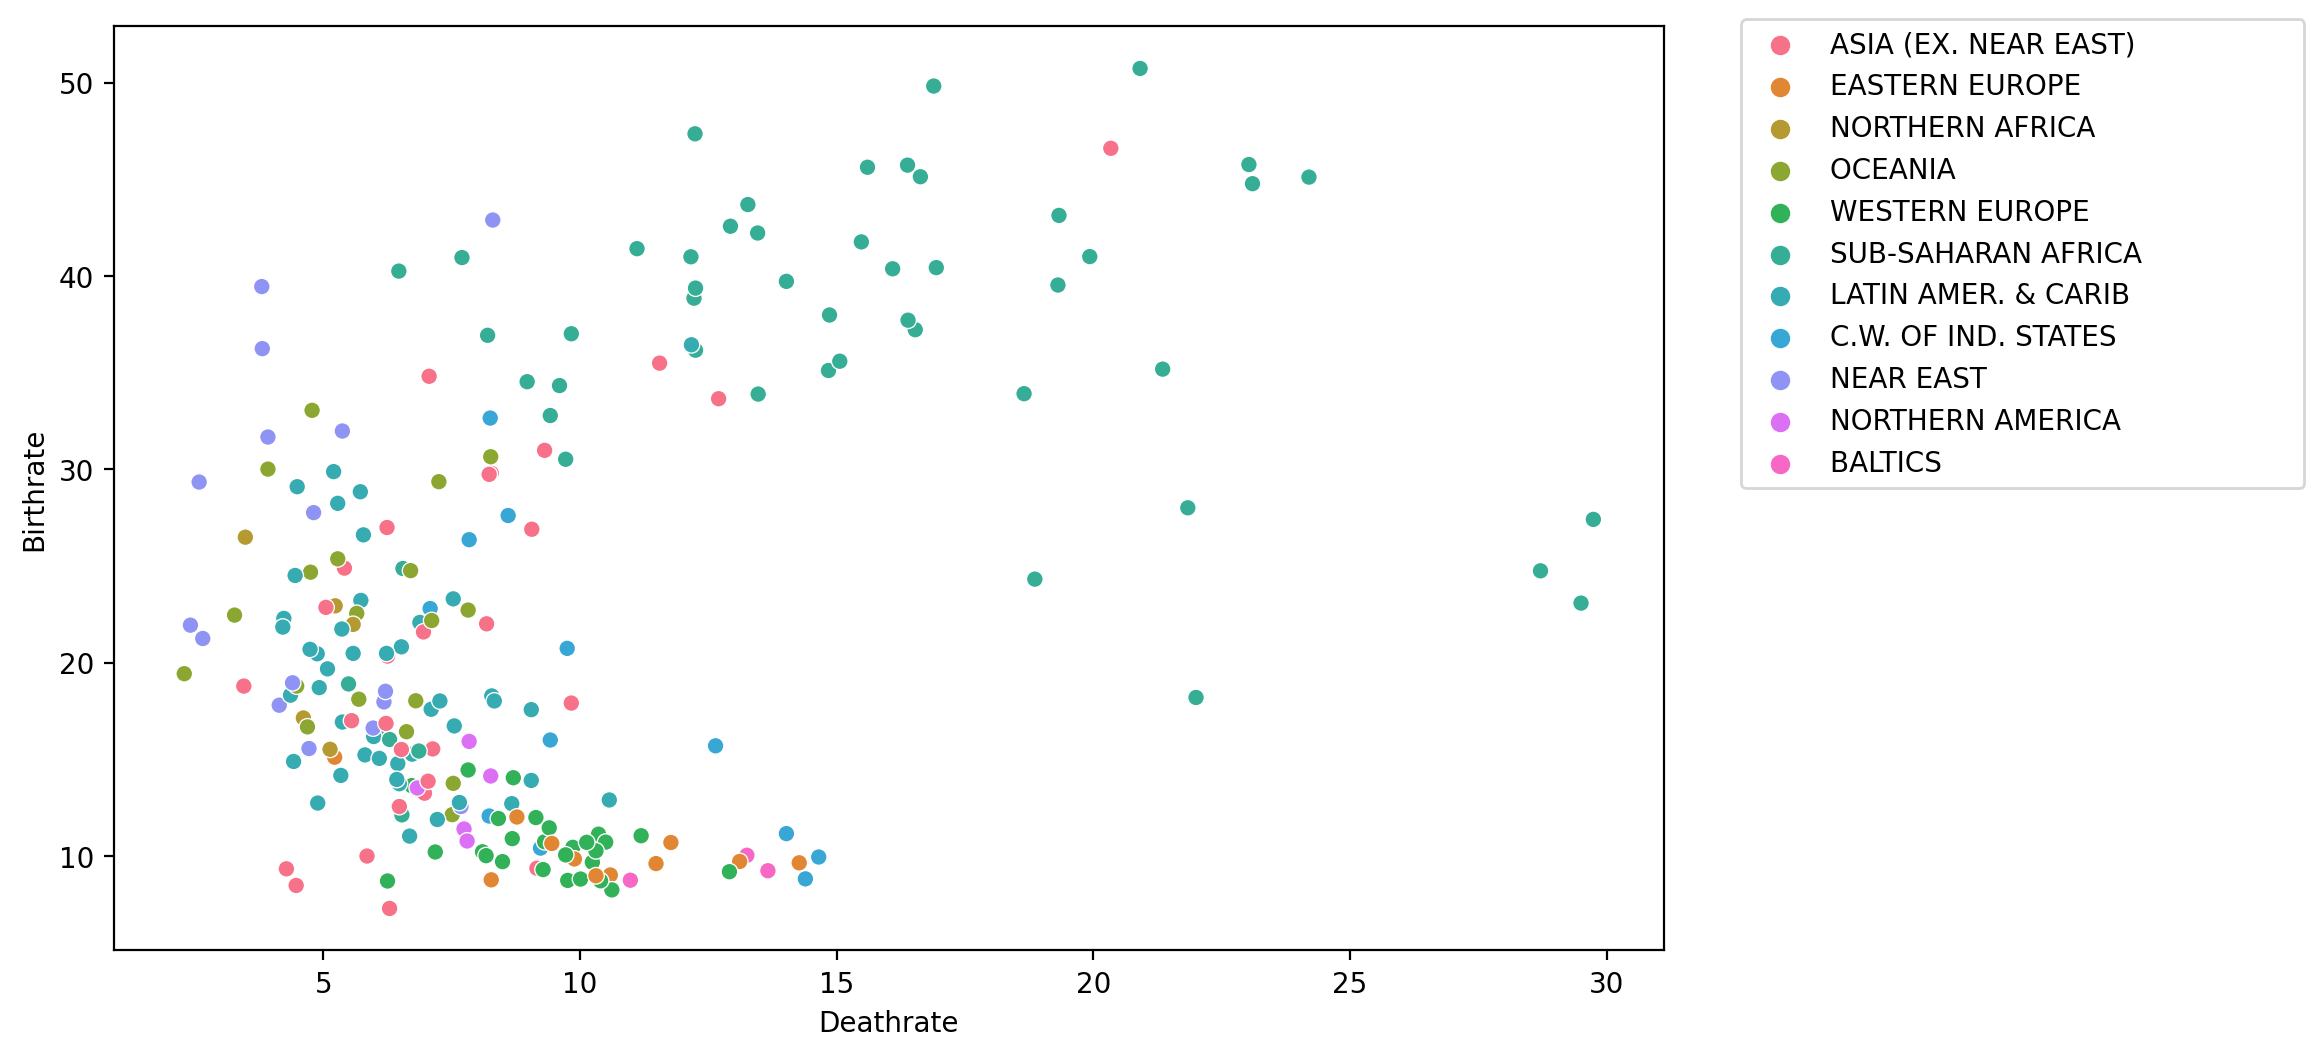

In [22]:
plt.figure(figsize=(10,6),dpi= 200)
sns.scatterplot(data = df, x ='Deathrate',y = 'Birthrate',hue = 'Region' )
plt.legend(loc = (1.05,0.5))
plt.show()

<Axes: >

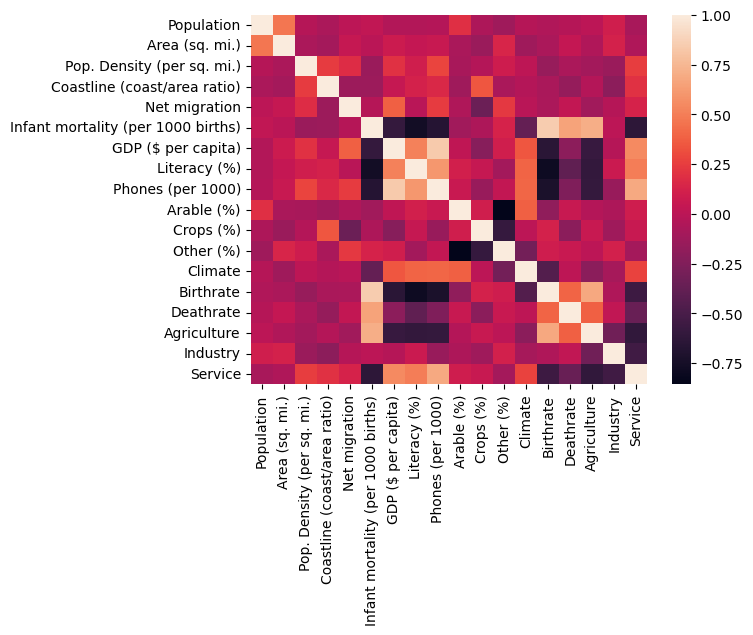

In [23]:
sns.heatmap(df.corr(numeric_only = True))

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data



In [24]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [25]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [26]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [27]:
df[df['Agriculture'].isnull()]['Country']

Series([], Name: Country, dtype: object)

In [28]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [29]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [30]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [31]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [32]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Data Feature Preparation

**It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [35]:
df_n = df.drop('Country',axis = 1)

In [36]:
X = pd.get_dummies(df_n,drop_first = True)

In [37]:
X.head()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                        48.0   
1     3581655           28748                       124.6   
2    32930091         2381740                        13.8   
3       57794             199                       290.4   
4       71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  ...  \
0                3.2       12.13  ...   
1               71.2       21.09  ...   
2               78.1        3.22  ...   
3              259.5       10.00  ...   
4              497.2        2.22  ...   

   Region_BALTICS                              Region_C.W. OF IND. STATES   \
0                                       False                        False   
1                                       False                        False   
2                                       False                        False   
3                                       False                        False   
4                                       False                        False   

   Region_EASTERN EUROPE                       Region_LATIN AMER. & CARIB      \
0                                       False                           False   
1                                        True                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   Region_NEAR EAST                            \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_NORTHERN AFRICA                      \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   Region_NORTHERN AMERICA                     \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_OCEANIA                              \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   

   Region_SUB-SAHARAN AFRICA                   \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_WESTERN EUROPE                       
0                                       False  
1                                       False  
2                                       False  
3             

### Scaling

**Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting Kmeans Model




In [41]:
from sklearn.cluster import KMeans

In [42]:
ssd = []

for i in range(2,30):
    model = KMeans(n_clusters = i)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

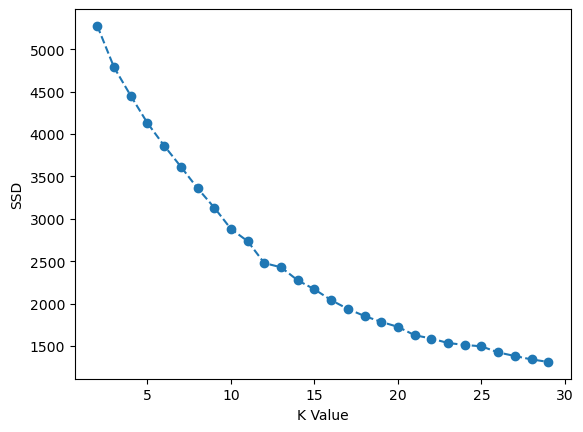

In [43]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel('K Value')
plt.ylabel('SSD')
plt.show()

<Axes: >

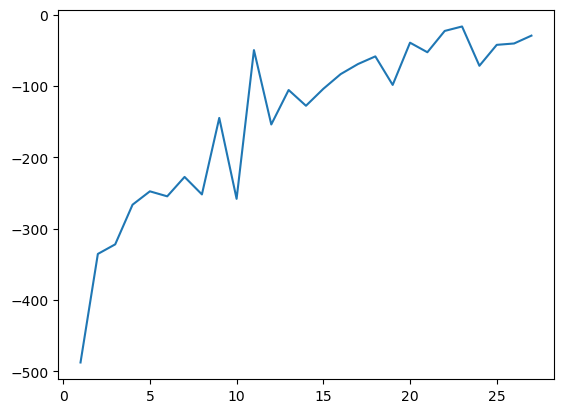

In [44]:
pd.Series(ssd).diff().plot()

# Model Interpretation





In [45]:
model_final = KMeans(n_clusters=30)

In [46]:
model_labels=model_final.fit_transform(scaled_X)

In [47]:
model_labels

array([[ 9.65121977,  9.19168596,  5.32193904, ..., 10.01888577,
         9.60302029, 10.17156638],
       [ 5.79977842,  6.34065947,  7.65704607, ...,  7.31522672,
         7.7918384 ,  7.84210756],
       [ 8.02568619,  8.33095824,  8.77571205, ...,  9.8407081 ,
         7.94413976, 10.05622032],
       ...,
       [ 6.77951563,  7.21151494,  6.01514153, ...,  8.96754126,
         7.49813557,  8.62480879],
       [ 6.11765684,  6.44684653,  2.78695735, ...,  7.60584384,
         7.07742057,  7.76846242],
       [ 5.71893787,  5.85392342,  3.77181968, ...,  7.13684686,
         6.97662039,  7.6701029 ]])

In [48]:
model_final.labels_

array([ 2,  6,  9, 22,  3, 11,  1,  1, 26, 12,  1, 25,  3, 12,  1,  5, 17,
        1, 27,  3, 26, 17, 10, 16, 26,  6, 11, 28,  1,  4,  6,  2,  4, 17,
        4, 16, 10,  4,  1,  2,  2, 26,  7, 26, 17,  2, 11, 26, 16,  6,  0,
        6,  3, 16,  0,  0, 26,  9,  0, 11, 16,  8,  2,  3, 18,  3,  3,  1,
       18, 11, 17, 20, 12,  3, 17, 19,  3, 13,  0,  1, 18, 26, 16,  2, 26,
       17, 26, 24,  6,  3,  7,  4,  4,  5,  3,  3, 20,  3,  0, 23,  3,  5,
       12, 16, 29,  4, 23,  5, 12,  2,  8, 20, 11,  2,  9,  3,  8,  3, 14,
        6, 16, 17,  4,  4,  2,  3, 29,  1, 16, 23, 17, 26, 15, 27,  4, 26,
        9, 16, 16, 18, 17,  3,  1, 18, 18, 26,  2, 17, 18,  3,  5, 17, 18,
       26, 18, 26, 26,  4,  6,  3, 26,  5, 23,  6, 21, 17,  4,  1,  0, 13,
        0, 22, 19, 29,  5, 16,  4,  2, 24,  6,  6, 18,  2, 16,  3,  4, 16,
       26, 11,  3,  3, 20, 23, 12,  2,  4, 17, 29,  0,  9, 20, 12, 26, 18,
       17, 27,  5,  3, 10, 26, 12, 18, 26,  4,  1, 18, 20,  9,  5, 16, 16])

In [49]:
X['cluster'] = model_final.labels_

In [50]:
df['cluster'] = model_final.labels_

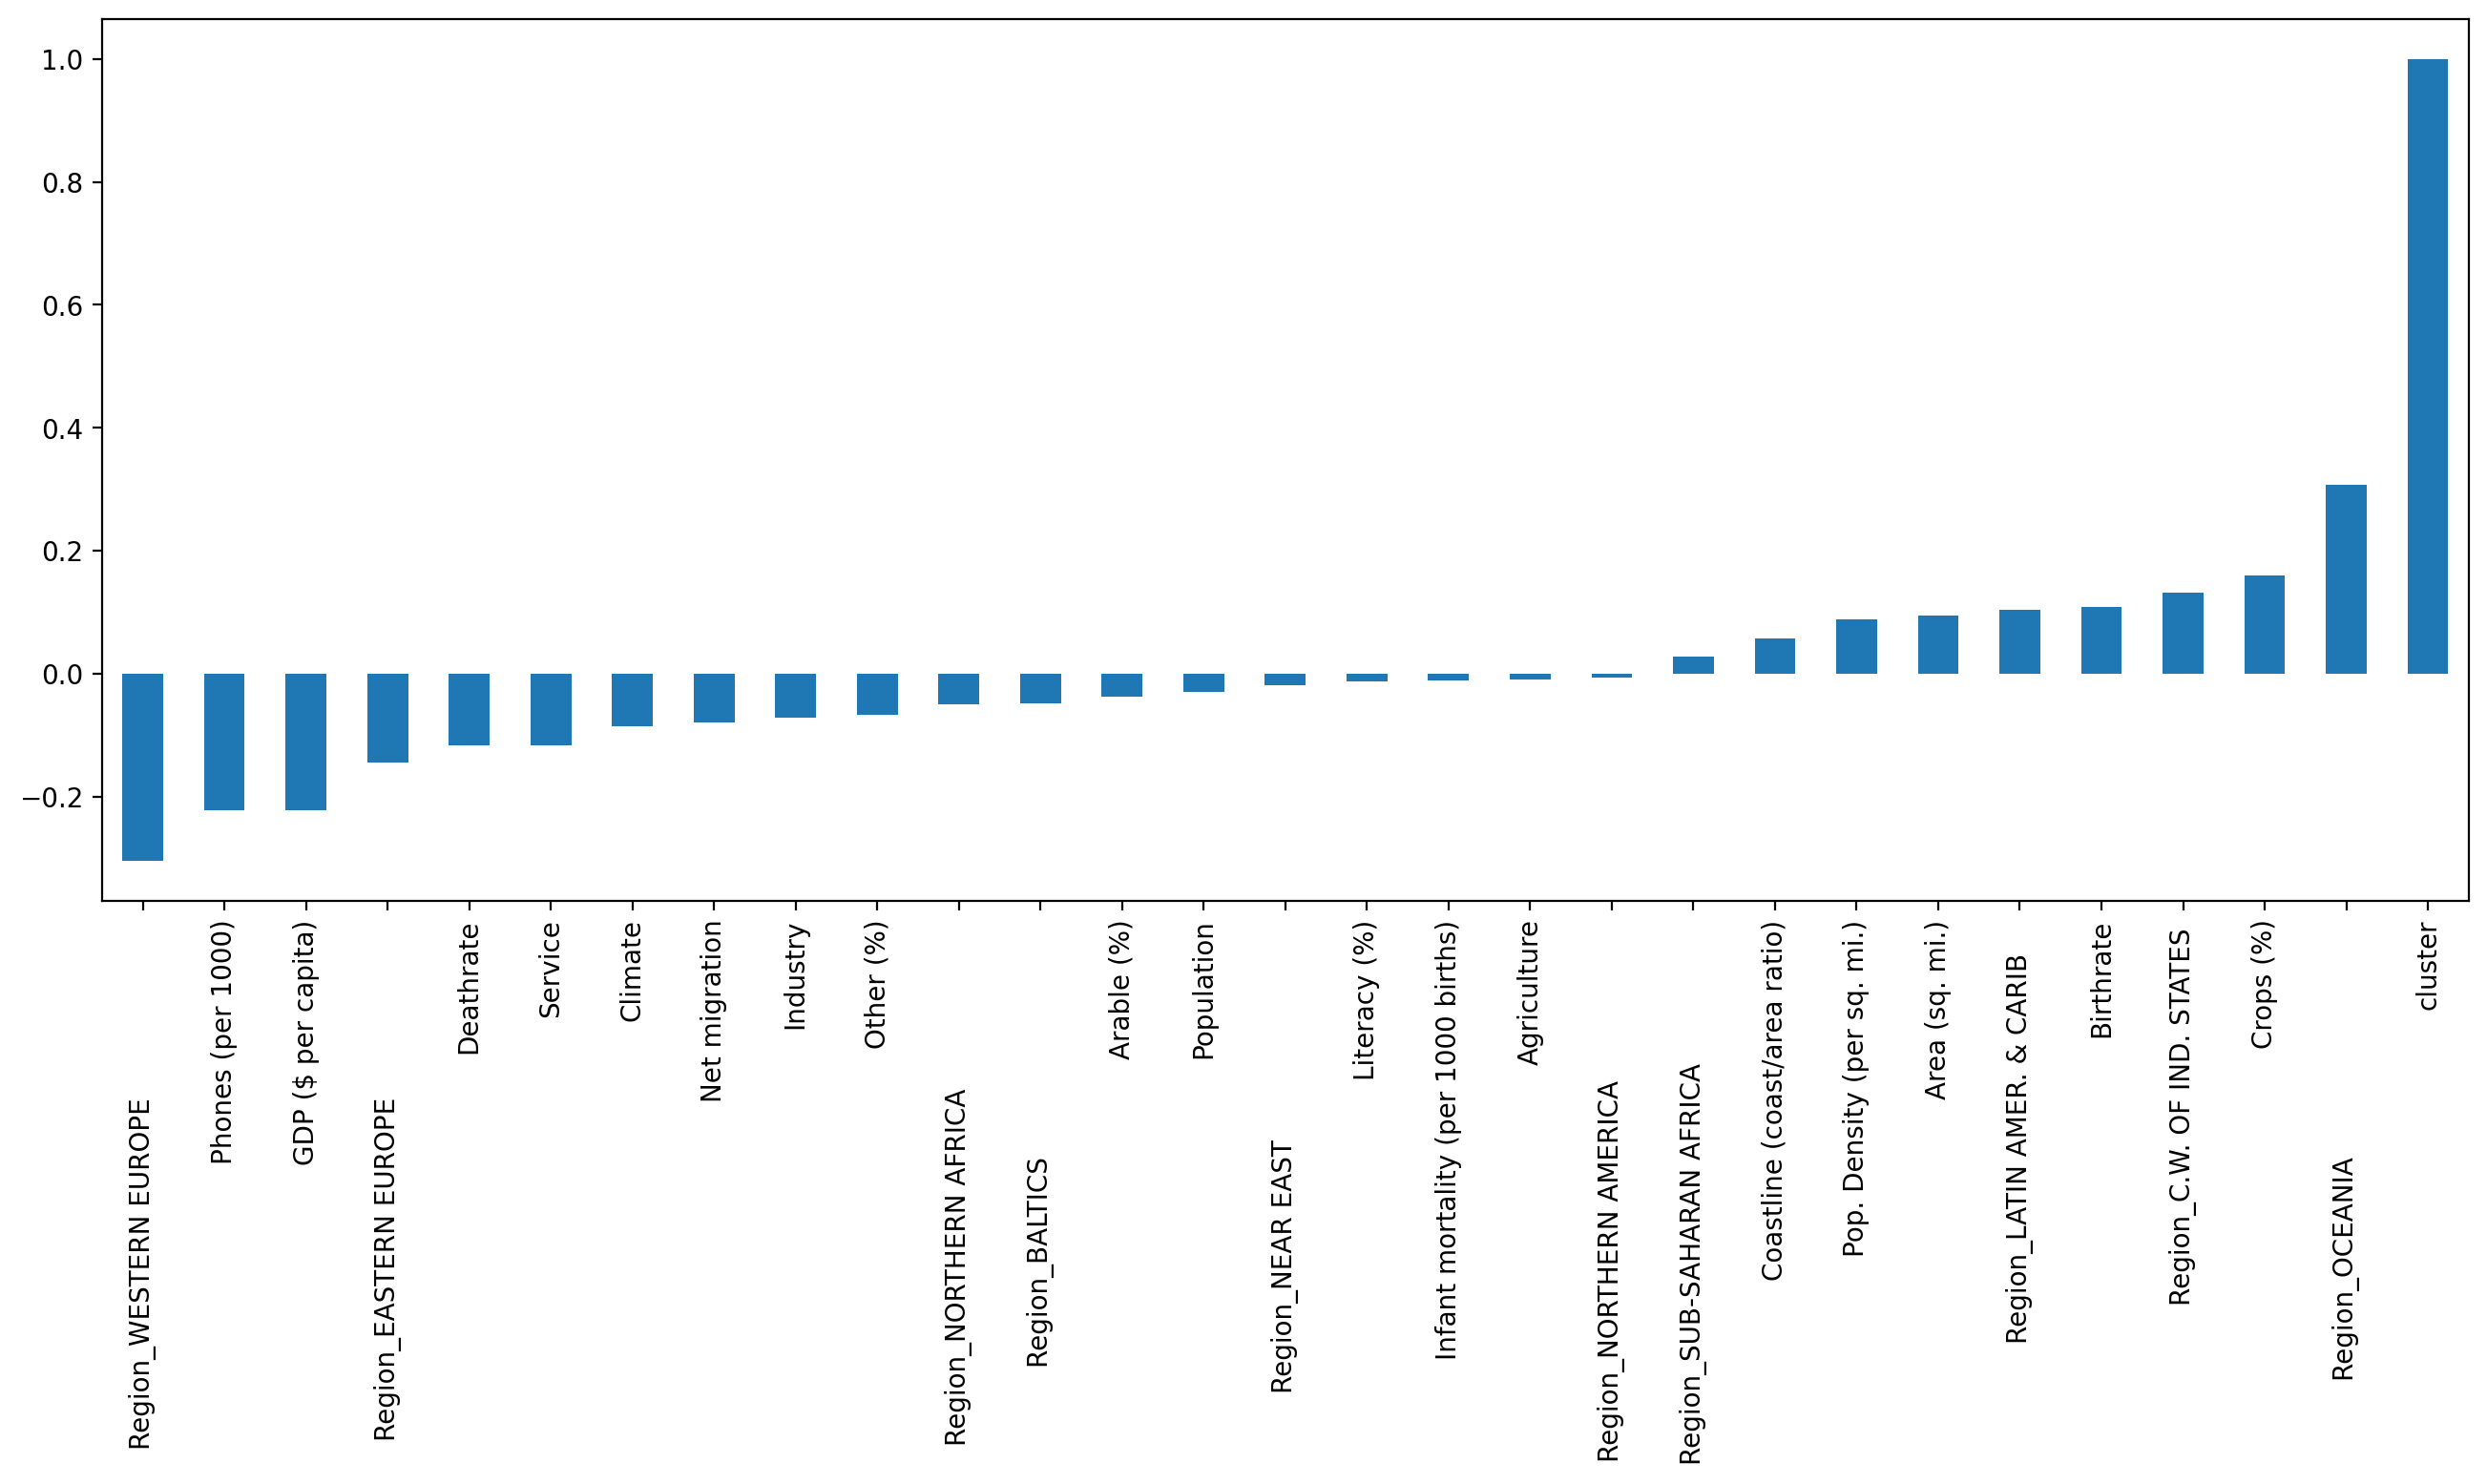

In [51]:
plt.figure(figsize = (16,6),dpi = 200)
X.corr()['cluster'].sort_values().plot(kind = 'bar')
plt.show()

------------
-------------


## Geographical Model Interpretation

In [52]:
!pip install plotly

In [53]:
iso_df = pd.read_csv(r'C:\Users\HP\Desktop\country_iso_codes.csv')

In [54]:
iso_df

Country  \
0                                        Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The   
2                                      Åland Islands   
3                                            Albania   
4                                            Algeria   
..                                               ...   
296                                 Congo, Dem. Rep.   
297                             Congo, Repub. of the   
298                                         Tanzania   
299                             Central African Rep.   
300                                    Cote d'Ivoire   

                                            ISO Code  
0                                                AFG  
1    Akrotiri and Dhekelia – See United Kingdom, The  
2                                                ALA  
3                                                ALB  
4                                                DZA  
..                                               ...  
296                                              COD  
297                                              COG  
298                                              TZA  
299                                              CAF  
300                                              CIV  

[301 rows x 2 columns]

In [55]:
cou_iso = iso_df.set_index('Country')['ISO Code'].to_dict()

In [56]:
df['ISO Code'] = df['Country'].map(cou_iso)

In [57]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0          36.0  ...       0.22      87.65      1.0      46.60      20.34   
1          86.5  ...       4.42      74.49      3.0      15.11       5.22   
2          70.0  ...       0.25      96.53      1.0      17.14       4.61   
3          97.0  ...      15.00      75.00      2.0      22.46       3.27   
4         100.0  ...       0.00      97.78      3.0       8.71       6.25   

   Agriculture  Industry  Service  cluster  ISO Code  
0        0.380     0.240    0.380        2       AFG  
1        0.232     0.188    0.579        6       ALB  
2        0.101     0.600    0.298        9       DZA  
3        0.000     0.000    0.000       22       ASM  
4        0.000     0.000    0.000        3       AND  

[5 rows x 22 columns]

In [58]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()